#  Συμβολική κι αριθμητική επίλυση ΣΔΕ

> Για να λύσετε αυτήν την διαφορική εξίσωση, την παρατηρείτε μέχρι να 
> φανερωθεί μια λύση της. 
> George Pólya (1887 - 1985)
> 

     

Ας υποθέσουμε ότι μας έχει δοθεί μια Συνήθης Διαφορική Εξίσωση (ΣΔΕ) και η μέθοδος του Pólya δεν είναι και τόσο αποτελεσματική για να βρούμε έστω και μια ειδική λύση της. Τότε το Sage μας παρέχει μια πλειάδα από συμβολικές και αριθμητικές μεθόδους τόσο για την ποιοτική μελέτη των λύσεων της ΣΔΕ, όσο και για να βρούμε (αν είναι εφικτό) την γενική λύση της. 

Συμβολικά, το Sage ενσωματώνει (μέσω του Maxima) όλες τις φαινομενικά αποκλίνουσες μεθόδους επίλυσης μιας ΣΔΕ πρώτης τάξης, που ίσως να σας φάνηκαν ένα ανιαρό συνταγολόγιο στην πρώτη επαφή που είχατε σε ένα προπτυχιακό μάθημα ΣΔΕ. Το γεγονός αυτό μας επιτρέπει να επικεντρωθούμε στα κύρια χαρακτηριστικά των λύσεων μιας ΣΔΕ και κατ' επέκταση του φυσικού-μαθηματικού, φαινομένου-μοντέλου που περιγράφει η αντίστοιχη ΣΔΕ.

Φυσικά, δεν είναι πάντα εφικτό για να βρούμε αναλυτικά (σε κλειστή μορφή) τις λύσεις μιας ΣΔΕ. Το αντίθετο ισχύει μάλιστα, δοσμένης μιας ΣΔΕ η εύρεση της γενικής της λύσης είναι ένα πολύ δύσκολο εγχείρημα γιατί πολύ απλά οι συναρτήσεις που έχουμε στην διάθεσή μας είναι πολύ λίγες για να περιγράψουν την πολυπλοκότητα του φαινομένου που μοντελοποιεί μια ΣΔΕ. Εδώ έρχεται και πάλι το Sage με μια πλειάδα από πανίσχυρα εργαλεία αριθμητικής επίλυσης ενός προβλήματος αρχικών-συνοριακών τιμών (ΠΑΤ-ΠΑΣΤ) για να μας δώσει μια αρκετά ικανοποιητική αριθμητική προσέγγιση της λύσης του. 

Τόσο τα συμβολικά όσο και τα αριθμητικά εργαλεία που μας παρέχει το Sage για την μελέτη μιας ΣΔΕ, παρέα με τις γραφικές ικανότητες που διαθέτει για την απεικόνιση των διανυσματικών πεδίων και των αντίστοιχων ροών τους, του χώρου των φάσεων, των διαγραμμάτων διακλάδωσης, των περιοδικών και σχεδόν περιοδικών τροχιών και σε τελική ανάλυση του συνόλου των λύσεων μιας ΣΔΕ είναι ένας συνδυασμός που μας επιτρέπει να ισχυριστούμε ότι 

> για να λύσετε αυτήν την ΣΔΕ, την μελετάτε με το Sage μέχρι να απεικονίσετε την λύση της,

παραφράζοντας τον Pólya.

##  Συμβολική επίλυση ΣΔΕ

###  ΣΔΕ πρώτης τάξης 

    
Ας θεωρήσουμε μια βαθμωτή ΣΔΕ πρώτης τάξης, δηλαδή μια εξίσωση της μορφής

$\begin{aligned} F\left(\,x,y(x),y'(x)\, \right) =0 \end{aligned}$

Κατ' αρχήν ξεκινάμε με τον καθορισμό της ανεξάρτητης και της εξαρτημένης μεταβλητής

In [1]:
x = var('x')
y = function('y')(x)

    
Για να λύσουμε συμβολικά μια ΣΔΕ πρώτης τάξης χρησιμοποιούμε την εντολή `desolve` η οποία σαν ορίσματα και επιλογές δέχεται τα εξής

`desolve(de, dvar, ics=..., ivar=..., show_method=..., contrib_ode=...)`

όπου

+ `de`  η εξίσωση που ορίζει την ΣΔΕ σε συμβολική μορφή. Για παράδειγμα για την ΣΔΕ $y'=2\,y+x$, δίνουμε ως εξίσωση στο Sage την συμβολική έκφραση `diff(y,x) == 2*y+x`.

+ `dvar` το όνομα της εξαρτημένης μεταβλητής, για παράδειγμα για την ΣΔΕ  $y'=2\,y+x$ δίνουμε `y` 

+ `ics` *προαιρετικό* όρισμα που αφορά τις αρχικές-συνοριακές συνθήκες. Για παράδειγμα για μια ΣΔΕ πρώτης τάξης θα δίναμε στο Sage `ics=[x0,y0]` που περιγράφει στην αρχική συνθήκη `y0=y(x0)`, ή για μια ΣΔΕ δεύτερης τάξης την λίστα `ics=[x0,y0,dy0]` που περιγράφει τις αρχικές συνθήκες `y0=y(x0), dy0=y'(x0),` ή συνοριακές συνθήκες `ics=[x0,y0,x1,y1]`. 

+ `ivar` *προαιρετικό* όρισμα που δηλώνει την ανεξάρτητη μεταβλητή. Για παράδειγμα  `ivar=x` αν έχουμε να λύσουμε την ΣΔΕ $y'=2\,y+x$. Το όρισμα αυτό πρέπει να προσδιορίζεται **απαραίτητα** αν η ΣΔΕ περιέχει παραμέτρους, για παράδειγμα η ΣΔΕ $y'=a\,y+b\,x+c$.

+ `show_method` *προαιρετικό* όρισμα που από προεπιλογή έχει την τιμή `False`. Όταν αλλάξει σε `True` το Sage μας εμφανίζει στο αποτέλεσμα και την μέθοδο που χρησιμοποίησε το Maxima για να επιλύσει συμβολικά την ΣΔΕ. Για παράδειγμα, ανάλογα την ΣΔΕ, μπορεί να μας επιστρέψει τους αγγλικούς όρους `linear`, `separable`, `exact`,
`homogeneous`, `bernoulli`, κτλ, ανάλογα αν η ΣΔΕ που ζητήσαμε να λύσουμε είναι γραμμική, χωριζομένων μεταβλητών, ακριβής, ομογενής, Bernoulli, κτλ αντίστοιχα.

+ `contrib_ode` <em>προαιρετικό</em> όρισμα που από προεπιλογή έχει την τιμή `False`. Όταν αλλάξει σε τιμή `True` το Sage μπορεί να επιλύσει ΣΔΕ τύπου Riccati, Lagrange, Clairaut, καθώς και άλλες παθολογικές περιπτώσεις. 

**Γραμμικές ΣΔΕ πρώτης τάξης** 
    
Είναι ΣΔΕ της μορφής 

$\begin{aligned} y' + P(x)\,y = Q(x)\,,\end{aligned}$

όπου $P,Q$ συνεχείς συναρτήσεις σε κάποιο κοινό διάστημα του πεδίου ορισμού τους. Για παράδειγμα με την βοήθεια του Sage θα βρούμε την γενική λύση της 

$\begin{aligned} y'+3\,y = e^x \,.\end{aligned}$

In [2]:
x = var('x')
y = function('y')(x)

In [3]:
sol1a = desolve(diff(y,x) + 3*y == exp(x), y, show_method=True); print sol1a

[1/4*(4*_C + e^(4*x))*e^(-3*x), 'linear']


    
Παρατηρούμε ότι το Sage (ουσιατικά το Maxima) ονομάζει την σταθερή ολοκλήρωσης με _C. Ας θεωρήσουμε τώρα την γραμμική ΣΔΕ

$\begin{aligned} y' + 2\,y = x^2 -2\,x+3\,.\end{aligned}$

Στο Sage μπορούμε να δώσουμε συμβολικά την ΣΔΕ και να του ζητήσουμε την γενική λύση της ΣΔΕ να μας την γράψει σε ανηγμένη μορφή χρησιμοποιώντας την μέθοδο `expand()`

In [4]:
SDE = diff(y,x) + 2*y == x^2 -2*x+3
sol1b = desolve(SDE, y).expand(); print sol1b

1/2*x^2 + _C*e^(-2*x) - 3/2*x + 9/4


    
Ας θέσουμε επιπλέον και την αρχική συνθήκη $y(0)=1$ στην προηγούμενη ΣΔΕ

In [5]:
sol1b_PAT = desolve(SDE, y, ics=[0,1]).expand(); print sol1b_PAT

1/2*x^2 - 3/2*x - 5/4*e^(-2*x) + 9/4


**ΣΔΕ με χωριζόμενες μεταβλητές** 
    
Είναι ΣΔΕ της μορφής 

$\begin{aligned} P(x) =y' \, Q(y)\end{aligned}$

όπου $P,Q$ συνεχείς συναρτήσεις σε κάποιο κοινό διάστημα του πεδίου ορισμού τους. Για παράδειγμα με την βοήθεια του Sage θα βρούμε την γενική λύση της 

$\begin{aligned} y\,y' = x \end{aligned}$

In [6]:
sol2a = desolve(y*diff(y,x) == x, y, show_method=True); print sol2a

[1/2*y(x)^2 == 1/2*x^2 + _C, 'separable']


    
Ως ένα άλλο παράδειγμα ας θεωρήσουμε την ΣΔΕ χωριζομένων μεταβλητών $y'\,\log y = y\,x$.

In [7]:
sol2b = desolve(diff(y,x)*log(y) == y*x, y, show_method=True); print sol2b

[1/2*log(y(x))^2 == 1/2*x^2 + _C, 'separable']


    
Το Sage συμφωνεί μαζί μας ότι πρόκειται για μια ΣΔΕ χωριζομένων μεταβλητών. Παρατηρήστε ότι το Sage δεν επιχειρεί να λύσει την εξίσωση ως προς $y(x)$. Αυτό αφήνεται στην διακριτική ευχέρεια του χρήστη να το κάνει αν είναι απαραίτητο, φυσικά με την απαραίτητη διερεύνηση των διαφόρων περιοχών ισχύος της λύσης

In [8]:
sol3b_y = solve(sol2b[0],y,solution_dict=true); print sol3b_y

[{y(x): e^(-sqrt(x^2 + 2*_C))}, {y(x): e^(sqrt(x^2 + 2*_C))}]


<div class="alert alert-warning">

**Προσοχή!!** Ορισμένες φορές το Sage δεν αναγνωρίζει μια ΣΔΕ ως χωριζομένων μεταβλητών και την χειρίζεται ως ακριβή ΣΔΕ. Για παράδειγμα η ΣΔΕ $y'=e^{x+y}$
</div>    

In [9]:
sol3 = desolve(diff(y,x) == exp(x+y), y, show_method=True); print sol3

[-(e^(x + y(x)) + 1)*e^(-y(x)) == _C, 'exact']


**ΣΔΕ Bernoulli** 
    
Είναι ΣΔΕ της μορφής 

$\begin{aligned} y' +P(x)\,y = Q(x)\, y^a\,,\end{aligned}$

όπου $P,Q$ συνεχείς συναρτήσεις σε κάποιο κοινό διάστημα του πεδίου ορισμού τους και $a\neq 0,1$. Για παράδειγμα με την βοήθεια του Sage θα βρούμε την γενική λύση της 

$\begin{aligned} y' - y =x\,y^4 \end{aligned}$

In [10]:
sol4 = desolve(diff(y,x)-y == x*y^4, y, show_method=True); print sol4

[e^x/(-1/3*(3*x - 1)*e^(3*x) + _C)^(1/3), 'bernoulli']


**Ομογενείς ΣΔΕ** 
    
Είναι ΣΔΕ της μορφής 

$\begin{aligned} y'  = \frac{P(x,y)}{Q(x,y)}\,,\end{aligned}$

όπου $P,Q$ ομογενείς συναρτήσεις του ίδιου βαθμού σε κάποιο δοσμένο διάστημα. Για παράδειγμα με την βοήθεια του Sage θα βρούμε την γενική λύση της 

$\begin{aligned} x^2\,y' =y^2+x\,y+x^2\,.\end{aligned}$

In [11]:
sol5 = desolve(x^2*diff(y,x) == y^2+x*y+x^2, y, show_method=True); print sol5

[_C*x == e^(arctan(y(x)/x)), 'homogeneous']


Ας θεωρήσουμε την ομογενή ΣΔΕ 

$\begin{aligned} x\,y'=y+\sqrt{x^2+y^2}\end{aligned}$ 

και ας επιχειρήσουμε να την επιλύσουμε όπως έχουμε μάθει, δηλαδή θεωρώντας την αντικαταστάση $y(x)=x\,u(x)$ να την μετατρέψουμε σε μια ΣΔΕ χωριζομένων μεταβλητών. Επειδή η ΣΔΕ δεν ορίζεται για $x=0$, την περιορίζουμε στο διάστημα $x\in (0,\infty)$. Στο Sage υλοποιούμε τα προηγούμενα ως εξής

In [12]:
u = function('u')(x)
y = x*u
SDE = x*diff(y,x) == y + sqrt(x^2+y^2); print SDE

(x*diff(u(x), x) + u(x))*x == x*u(x) + sqrt(x^2*u(x)^2 + x^2)


In [13]:
assume(x>0)
sol5b = desolve( SDE , u ); print sol5b

x == _C*e^arcsinh(u(x))


    
Παρατηρούμε ότι η λύση μας δίνεται σε πεπλεγμένη μορφή η οποία όμως μπορεί να απλοποιηθεί μέσω ταυτοτήτων που ισχύουν μεταξύ της συνάρτησης λογαρίθμου και των υπερβολικών τριγωνομετρικών συναρτήσεων και των αντιστρόφων τους. Μπορούμε να χρησιμοποιήσουμε τις ταυτότητες αυτές μέσω της επιλογής logarc του Maxima. Πιο συγκεκριμένα, από το Sage οδηγούμε το Maxima που εκτελεί την ολοκλήρωση να χρησιμοποιήσει υπερβολικές τριγωνομετρικές ταυτότητες ως εξής

In [14]:
S = desolve(SDE,u)._maxima_().ev(logarc=True).sage(); print S

x == _C*(sqrt(u(x)^2 + 1) + u(x))


    
Η γενική λύση της ΣΔΕ για την μεταβλητή $u(x)$ είναι λοιπόν πιο απλή και έχει την μορφή

$\begin{aligned} c^2 \, (u^2+1) = (x - c\,u)^2 \end{aligned}$

και επιστρέφοντας στην αρχική μεταβλητή $y(x)$ έχουμε ότι 

In [16]:
reset('y'); var('y , c');
lysh = S.subs({u(x):y/x}); print lysh
eq = c^2*( (y/x)^2 +1)==(x-c*y/x)^2 ; print solve(eq,y)

x == _C*(sqrt(y^2/x^2 + 1) + y/x)
[
y == -1/2*(c^2 - x^2)/c
]


    
Δηλαδή η γενική λύση της αρχικής μας ΣΔΕ έχει την απλή μορφή

$\begin{aligned} y(x) = \frac{x^2-c^2}{2\,c} \end{aligned}$

Οπότε από το παράδειγμα αυτό συμπεραίνουμε ότι ορισμένες φορές είμαστε υποχρεωμένοι να βοηθήσουμε εμείς το Sage έτσι ώστε να βρούμε την γενική λύση μιας ΣΔΕ. Αυτό συμβαίνει επειδή το λογισμικό δεν αντιλαμβάνεται ότι ουσιαστικά δουλεύουμε σε ένα διάστημα και στο διάστημα αυτό ισχύουν επιπλέον υποθέσεις για την λύση που αναζητούμε.

**Ακριβείς ΣΔΕ** 
    
Είναι ΣΔΕ που γράφονται ως ένα ακριβές διαφορικό, δηλαδή ΣΔΕ της μορφής 

$\begin{aligned}  \frac{\partial f}{\partial x} \, {\mathrm d} x + \frac{\partial f}{\partial y} \, {\mathrm d} y  = 0\,,\end{aligned}$

όπου $f$ διαφορίσιμη συνάρτηση στο πεδίο ορισμού της. Για παράδειγμα με την βοήθεια του Sage θα βρούμε την γενική λύση της 

$\begin{aligned} y' = \frac{\cos y - 2\,x}{y+x\,\sin y}\,, \qquad f(x,y) = x^2-x\,\cos y +\frac{y^2}{2}\,.\end{aligned}$

In [17]:
reset()
x = var('x')
y = function('y')(x)
sol6 = desolve(diff(y,x) == (cos(y)-2*x)/(y+x*sin(y)), y, show_method=True); print sol6

[x^2 - x*cos(y(x)) + 1/2*y(x)^2 == _C, 'exact']


**ΣΔΕ Riccati** 
    
Είναι ΣΔΕ της μορφής 

$\begin{aligned}  y' = P(x)\,y^2 + Q(x)\,y + R(x)\,,\end{aligned}$

όπου $P,Q,R$ συνεχείς συναρτήσεις σε κάποιο κοινό διάστημα του πεδίου ορισμού τους. Για παράδειγμα με την βοήθεια του Sage θα βρούμε την γενική λύση της 

$\begin{aligned} y' = x\,y^2 + \frac{1}{x}\,y + \frac{1}{x} \,.\end{aligned}$

Σε αυτό το παράδειγμα πρέπει το όρισμα `contrib_ode` να το αλλάξουμε σε `True`, έτσι ώστε το Sage να χρησιμοποιήσει πιο περίπλοκες μεθόδους ολοκλήρωσης ΣΔΕ 

In [18]:
sol7 = desolve(diff(y,x) == x*y^2+y/x+1/x, y, contrib_ode=True, show_method=True); print sol7

[[y(x) == -(_C*cos(x) - sin(x))/((_C + x)*cos(x) + (_C*x - 1)*sin(x))], 'riccati']


**ΣΔΕ Lagrange και Clairaut** 
    
Μια ΣΔΕ της μορφής

$\begin{aligned}  y = x\,P(y') + Q(y')\,,\end{aligned}$

όπου $P,Q$ διαφορίσιμες συναρτήσεις σε κάποιο κοι διάστημα, ονομάζεται τύπου Lagrange. Ειδικότερα, όταν η συνάρτηση $P$ είναι η ταυτοτική συνάρτηση, η ΣΔΕ καλείται τύπου Clairaut. Για παράδειγμα, η ΣΔΕ 

$\begin{aligned} y = x\,y' - y'^2 \,.\end{aligned}$

είναι τύπου Clairaut, και με την βοήθεια του Sage η γενική λύση της ΣΔΕ και η ειδική λύση της είναι

In [19]:
sol8 = desolve(y == x*diff(y,x)-diff(y,x)^2, y,contrib_ode=True, show_method=True); print sol8

[[y(x) == -_C^2 + _C*x, y(x) == 1/4*x^2], 'clairault']


    
Ας παραστήσουμε γραφικά την παραμετρική οικογένεια ευθειών καθώς και της παραβολής που απαρτίζουν την γενική και την ειδική λύση, αντίστοιχα, της παραπάνω ΣΔΕ τύπου Clairaut

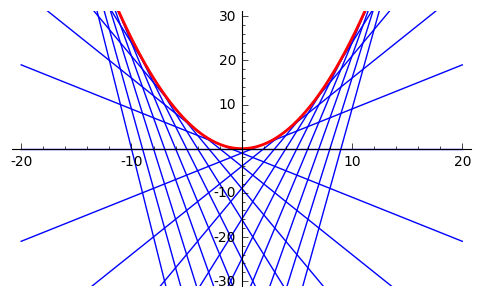

In [20]:
plt = Graphics()
var('c')
f = -c^2+c*x   
for j in range(0,20,1):
    plt += plot(f(c=-10 + j) ,-20,20,thickness=1)
plt2 = plot(1/4*x^2,-20,20,color='red',thickness=2)
(plt+plt2).show(ymin=-30,ymax=30,figsize=5,aspect_ratio=0.4)

**ΣΔΕ με παραμέτρους - Το λογιστικό πληθυσμιακό μοντέλο** 
    
Το 1838 ο Βέλγος µαθηµατικός Pierre François Verhulst διατύπωσε το λογιστικό μοντέλο πληθυσμιακής ανάπτυξης. Σύμφωνα με το μοντέλο αυτό ο πληθυσµός P συχνά αυξάνεται εκθετικά στα αρχικά στάδια ζωής του όµως σταδιακά φτάνει στο όριο χωρητικότητας, εξαιτίας περιβαλλοντικών πιέσεων και περιορισµένων διατροφικών πόρων. Για να περιγράψουµε το γεγονός ότι η σχετική ανάπτυξη µειώνεται καθώς ο πληθυσµός αυξάνει και γίνεται αρνητικός αν το P ξεπεράσει την φέρουσα χωρητικότητα Κ του περιβάλλοντος, δηλαδή τον µέγιστο πληθυσµό που είναι ικανό να υποστηρίξει το περιβάλλον µακροπρόθεσµα, θεωρούµε ότι ο σχετικός ρυθµός ανάπτυξης δίνεται από την ΣΔΕ 

$\begin{aligned} \frac{1}{P}\,\frac{\mathrm{d}\,P}{\mathrm{d}\, t} = r\,(1-\frac{P}{K})\quad \Leftrightarrow \quad \frac{\mathrm{d}\,P}{\mathrm{d}\, t} = r\,P\,(1-\frac{P}{K}) \end{aligned}$

όπου $r,K$ παράμετροι με τιμές στους θετικούς πραγματικούς αριθμούς. Ας επιλύσουμε την ΣΔΕ αυτή με την βοήθεια του Sage

In [21]:
reset()
var('t r K');
assume(r>0); assume(K>0);
P = function('P')(t);

In [22]:
SDE = diff(P,t) == r*P*(1-P/K); print SDE

diff(P(t), t) == -r*(P(t)/K - 1)*P(t)


In [23]:
sol = desolve( SDE,[P,t]); print sol

-(log(-K + P(t)) - log(P(t)))/r == _C + t


    
Παρατηρούμε ότι το Sage μας δίνει την λύση σε πεπλεγμένη μορφή όπου εμφανίζεται και πάλι η συνάρτηση λογαρίθμου. Για να μπορέσουμε να λύσουμε ως προς την εξαρτημένη μεταβλητή $P$ θα πρέπει να χρησιμοποιήσουμε μεθόδους του Sage που γνωρίζουν ταυτότητες που ισχύουν για την συνάρτηση του λογαρίθμου. Η μέθοδος αυτή είναι η `simplify_log()`. Με τις παρακάτω διαδοχικές εντολές οδηγούμε το Sage να μας δώσει την λύση ως προς την μεταβλητή $P$

In [24]:
Sol = sol.lhs() - sol.rhs() ; print Sol

-_C - t - (log(-K + P(t)) - log(P(t)))/r


In [25]:
Sol2 = Sol.simplify_log(); print Sol2

-(_C*r + r*t + log(-(K - P(t))/P(t)))/r


In [26]:
Sol3 = solve(Sol2, P)[0].simplify() ;  Sol3.show()

P(t) == -K/(e^(-_C*r - r*t) - 1)

    
Οπότε η γενική λύση της ΣΔΕ του λογιστικού πληθυσμιακού μοντέλου είναι η 

$\begin{aligned} P(t) = \frac{K}{1-e^{-r\,(t+c)}} \,.\end{aligned}$

### Γραφική απεικόνιση των λύσεων μιας ΣΔΕ - ολοκληρωτικές καμπύλες 

    
Ας θεωρήσουμε την αμέσως προηγούμενη ΣΔΕ του λογιστικού πληθυσμιακού μοντέλου και ας υποθέσουμε ότι θέλουμε να απεικονίσουμε γραφικά την λύση μας για διάφορες τιμές της σταθερής ολοκλήρωσης. Πρώτα απ'όλα ας δούμε ποιές θεωρεί το Sage ως συμβολικές μεταβλητές στην παραπάνω λύση.

In [27]:
print Sol3.variables()

(K, _C, r, t)


    
Το Sage θεωρεί ως μεταβλητές την σταθερή ολοκλήρωσης _C, την ανεξάρτητη μεταβλητή t, καθώς και τις παραμέτρους $r,K$. Την $P$ το Sage δεν την θεωρεί μεταβλητή γιατί η $P$ δηλώθηκε ως συνάρτηση του t παραπάνω. Η σταθερή ολοκλήρωσης _C έρχεται από την διαδικασία ολοκλήρωσης της ΣΔΕ που εκτελεί το Maxima, και για να έχουμε πρόσβαση σε αυτή θέτουμε την δεύτερη συνιστώσα στο αποτέλεσμα .variables() σε μια συμβολική έκφραση. Έπειτα αντικαθιστουμε τόσο την συνάρτηση y(x) όσο και την _C σε νέες συμβολικές εκφράσεις π.χ. w και c αντίστοιχα, με σκοπό να τις χειριστούμε κατάλληλα για την γραφική απεικόνιση της λύσης μας. Τα προηγούμενα υλοποιούνται στο Sage με τις ακόλουθες εντολές.

In [28]:
k = Sol3.variables()[1]
var('c p')
lysh = Sol3.subs({P(t):p, k:c}); print lysh

p == -K/(e^(-c*r - r*t) - 1)


    
Ας υποθέσουμε τώρα ότι ο αρχικός πληθυσμός είναι $P(0)=P_0$. Θέτοντας $t=0$ στην λύση που βρήκαμε έχουμε

In [29]:
var('p0')
lysh0 = lysh(t=0,p=p0) ; print lysh0

p0 == -K/(e^(-c*r) - 1)


    
Οπότε η σταθερή ολοκλήρωσης c μπορεί να εκφρασθεί ως συνάρτηση της αρχικής συνθήκης $P_0$ και της παραμέτρου K. Πραγματικά

In [30]:
c_sub = solve(lysh0,c,solution_dict=true);
lysh_p0 = lysh.subs(c_sub).simplify_full() ; print lysh_p0

p == K*p0*e^(r*t)/(p0*e^(r*t) + K - p0)


Δηλαδή η λύση παίρνει την μορφή

$\begin{aligned} P(t) = \frac{K\,P_0 \, e^{r\,t}}{P_0\,e^{r\,t} + K - P_0}\end{aligned}$

όπου τώρα μπορούμε να θέσουμε διάφορες τιμές στην συμβολική μεταβλητή που εκφράζει την αρχική συνθήκη $P_0$. Πράγματι

In [31]:
plt = Graphics()
for j in range(0,10,1):
    plt += plot(lysh_p0.rhs()(K=1,r=0.5,p0=j/4),0,9,thickness=1.3)

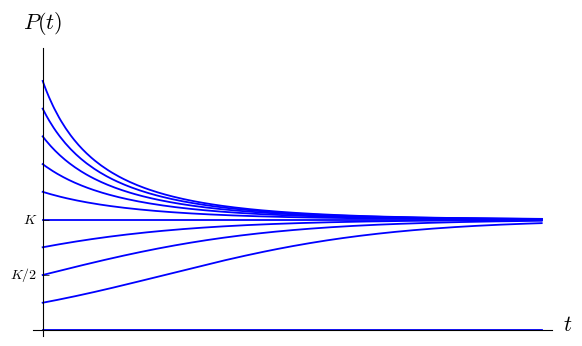

In [32]:
plt.show(figsize=6,ymin=0,ymax=2.5,aspect_ratio=2, axes_labels=['$t$','$P(t)$'], \
        ticks=[[],[1,0.5]], tick_formatter=[[],["$K$","$K/2$"]])

    
Παρατηρούμε, όπως αναμέναμε άλλωστε, ότι υπάρχουν δυο λύσεις ισορροπίας, η $P=0$, και η $P=K$. Επίσης παρατηρούμε από το σχήμα ότι αν $0 < P_0 < K$, ο πληθυσμός αυξάνεται γρηγορότερα όταν φτάσει στο μισό της φέρουσας χωρητικότητας. Πράγματι, η δεύτερη παράγωγος $P''(t)$ υπολογίζεται από την ίδια την ΣΔΕ και είναι 

In [33]:
print diff(SDE.rhs(),t).subs({diff(P,t) : SDE.rhs()}).factor()

(K - P(t))*(K - 2*P(t))*r^2*P(t)/K^2


    
Αφού $P(t)=0$, και  $P(t)=K$, είναι λύσεις ισορροπίας, από την δεύτερη παράγωγο που υπολογίσαμε αμέσως παραπάνω, συμπεραίνουμε ότι ο ρυθμός αύξησης του $P'(t)$ έχει ακρότατη τιμή (μέγιστο) όταν $P(t)=K/2$.

    
Ας θεωρήσουμε τώρα την ΣΔΕ χωριζομένων μεταβλητών  

$\begin{aligned} y'\,\log y = y\,\sin x\,.\end{aligned}$

Θα βρούμε πρώτα συμβολικά την γενική της λύση με το Sage, κι έπειτα θα απεικονίσουμε γραφικά την γενική λύση (δηλαδή θα βρούμε τις ολοκληρωτικές καμπύλες της ΣΔΕ) για διάφορες τιμές της σταθερής ολοκλήρωσης.

In [34]:
reset()
x = var('x')
y = function('y')(x)
sol = desolve(diff(y,x)*log(y) == y*sin(x), y); print sol

1/2*log(y(x))^2 == _C - cos(x)


    
Θα πρέπει τώρα να βρούμε πως έχει διαχειριστεί το Sage την σταθερή ολοκλήρωσης.

In [35]:
print sol.variables()

(_C, x)


In [36]:
k = sol.variables()[0]
var('c w')
lysh = sol.subs({y(x):w, k:c}); print lysh

1/2*log(w)^2 == c - cos(x)


In [37]:
P = Graphics()
for j in range(1,20,1):
    P += implicit_plot(lysh(c=-3+j/4),(x,-3*pi,3*pi),(w,0,3),plot_points=350)

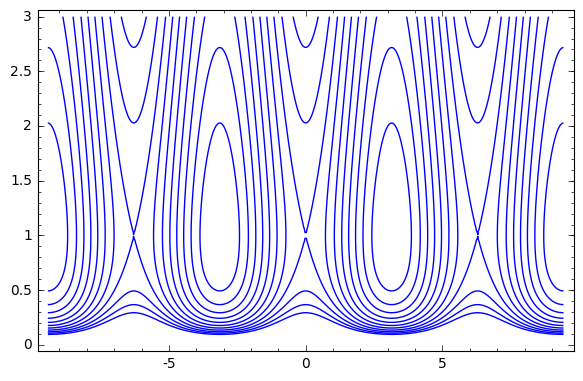

In [38]:
P.show(figsize=6,aspect_ratio=4)

###  ΣΔΕ δεύτερης τάξης

**ΣΔΕ 2ης τάξης με σταθερούς συντελεστές** 
    
Ας θεωρήσουμε τώρα ΣΔΕ δεύτερης τάξης με σταθερούς συντελεστές, για παράδειγμα την ΣΔΕ 

   $\begin{aligned} y'' + y = \sin x+ x\, \cos x \end{aligned}$

Για να βρούμε την γενική της λύση εκτελούμε τις παρακάτω εντολές

In [39]:
x = var('x'); y = function('y')(x)
SDE = diff(y,x,2) + y == sin(x) + x*cos(x) 

In [40]:
sol2d = desolve(SDE, y,show_method=True); print sol2d

[_K2*cos(x) - 1/4*x*cos(x) + 1/8*(2*x^2 - 1)*sin(x) + _K1*sin(x), 'variationofparameters']


    
Η μέθοδος που χρησιμοποιεί το Maxima για την εύρεση της γενικής λύσης της παραπάνω ΣΔΕ είναι η μέθοδος μεταβολής των παραμέτρων, ή μέθοδος Lagrange. Αν μας δίνεται το ΠΑΤ που απαρτίζετια από την ΣΔΕ και τις αρχικές συνθήκες $y(0)=1$, $y'(0)=2$, τότε για την επίλυση του ΠΑΤ εκτελούμε

In [41]:
sol2d_pat = desolve(SDE, y, ics=[0,1,2]); print sol2d_pat

-1/4*x*cos(x) + 1/8*(2*x^2 - 1)*sin(x) + cos(x) + 19/8*sin(x)


    
ενώ για το πρόβλημα συνοριακών τιμών (ΠΣΤ) $y(0)=0$, $y(1)=0$, η λύση που μας δίνει το Sage είναι

In [42]:
sol2d_pst = desolve(SDE, y, ics=[0,0,1,0]); print sol2d_pst

-1/4*x*cos(x) + 1/8*(2*x^2 - 1)*sin(x) + 1/8*(2*cos(1) - sin(1))*sin(x)/sin(1)


    
Όμως δεν έχει υλοποιηθεί ακόμα συμβολικός αλγόριθμος στο Sage που να επιλύει προβλήματα συνοριακών τιμών με μικτές συνοριακές συνθήκες, για παράδειγμα συνοριακές συνθήκες της μορφής $y(0)-y(1)=0$, $y'(0)-y'(1)=0$. Μια μέθοδος για να επιλύσουμε τέτοιου είδους ΠΣΤ είναι μέσω της αναλυτικής κατασκευής της λεγόμενης συνάρτησης Green, η οποία (αν υπάρχει) κατασκευάζεται με αλγοριθμικό  τρόπο, αρκεί ο χρήστης να έχει τις κατάλληλες γνώσεις. Μια τέτοια αναλυτική διαπραγμάτευση είναι έξω από τους στόχους των σημειώσεων αυτών.

**ΣΔΕ Euler** 
    
Πρόκειται για γραμμικές ΣΔΕ 2ης τάξης της ακόλουθης μορφής

$\begin{aligned} a\,x^2\,y'' + b\,x\,y' + c\,y = f(x) \end{aligned}$

όπου $x\neq 0$ και $f(x)$ συνεχής συνάρτηση σε κάποιο κατάλληλο διάστημα. Για παράδειγμα

In [43]:
reset()
x = var('x'); y = function('y')(x)
SDE = x^2*diff(y,x,2) + 3*x*diff(y,x) + 2*y == x^2
sol = desolve(SDE, y); print sol

1/10*x^2*cos(log(x))^2 + 1/10*x^2*sin(log(x))^2 + (_K2*cos(log(x)) + _K1*sin(log(x)))/x


**Ειδικές συναρτήσεις** 
    
Το Sage γνωρίζει πάρα πολλές (αν όχι όλες) ΣΔΕ οι λύσεις των οποίων ορίζουν τις λεγόμενες ειδικές συναρτήσεις. Για παράδειγμα, οι συναρτήσεις Airy του πρώτου και δεύτερου είδους στο Sage είναι οι συναρτήσεις `airy_ai()` και `airy_bi()`, και οι οποίες είναι δυο γραμμικώς ανεξάρτητες λύσεις της ΣΔΕ $y'' + x\,y=0$. Πράγματι

In [44]:
reset()
var('x c1 c2')
y = c1*airy_ai(x) + c2*airy_bi(x)
SDE = diff(y,x,2) - x*y ; print SDE.expand()

0


    
Το όριο καθώς $x\rightarrow \infty$ των αντίστοιχων συναρτήσεων είναι

In [45]:
print limit(airy_ai(x),x=oo);
print limit(airy_bi(x),x=oo);

0
+Infinity


    
και η γραφική τους παράσταση ακολουθεί

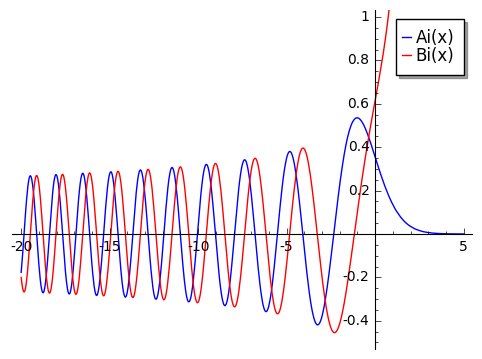

In [46]:
plot_ai = plot(airy_ai(x), (x, -20, 5) , color='blue', legend_label='Ai(x)') ;
plot_bi = plot(airy_bi(x), (x, -20, 5) , color='red' , legend_label='Bi(x)') ;
(plot_ai + plot_bi).show(ymin=-0.5,ymax=1,figsize=5)

    
Ένα πολύ ενδιαφέρον πρόβλημα της φυσικής, η **κβαντική μπάλα**, ανάγεται στην επίλυση της παραπάνω ΣΔΕ και οι συνοριακές συνθήκες του προβλήματος αυτού επιβάλλουν οι τιμές της ενέργειας $q_Ε$ να είναι κβαντισμένες $n=1,2,3,\ldots$, και οι οποίες υπολογίζονται από τις ρίζες της συνάρτησης Ai(x)=0. Στο Sage μπορούμε να βρούμε τις ρίζες τις συνάρτησης Ai(x) μέσω του SciPy, ως εξής

In [47]:
import numpy as np
import pylab
from scipy.special import airy, ai_zeros

In [48]:
a = ai_zeros(int(16)) ; print a[0]  # οι πρώτες 16 ρίζες της συνάρτησης Ai(x)

[ -2.33810741  -4.08794944  -5.52055983  -6.78670809  -7.94413359
  -9.02265085 -10.04017434 -11.0085243  -11.93601556 -12.82877675
 -13.69148904 -14.52782995 -15.34075514 -16.13268516 -16.905634
 -17.66130011]


    
Στο παρακάτω γραφικό απεικονίζουμε τις πρώτες 16 ρίζες της Ai(x) παρέα με την συνάρτηση Ai(x).

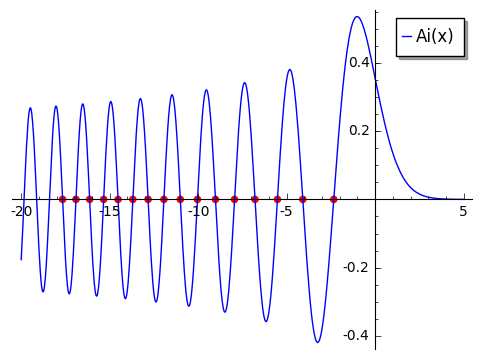

In [49]:
ppoints = [ (a[0][i],0) for i in range(16) ] ; 
plotp = points(ppoints,color='red',size=30) ; (plotp+plot_ai).show(figsize=5)

    
Είναι περιττό να πούμε ότι στο Sage υπάρχουν διαθέσιμες σχεδόν (αν όχι) όλες οι ειδικές συναρτήσεις όπως οι υπεργεωμετρικές, Ηermite, Laguerre, Legendre, Chebyshev, οι ελλειπτικές συναρτήσεις Jacobi, κτλ.

### Μετασχηματισμός Laplace

    
Ο μετασχηματισμός Laplace μετατρέπει μια γραμμική ΣΔΕ και τις αρχικές συνθήκες σε μια αλγεβρική εξίσωση για την εξαρτημένη μεταβλητή σε έναν παραμετρικό χώρο $y(s)$, και με τον αντίστροφο μετασχηματισμό Laplace ανακτούμε την λύση $y(x)$ της ΣΔΕ οι οποία ικανοποιεί τις δοσμένες αρχικές συνθήκες. <br> 
Ειδικότερα, αν η συνάρτηση $f(t)$ ορίζεται για $t \geq 0$, και ικανοποιεί τις συνθήκες που θα αναφερούμε παρακάτω, ο μετασχηματισμός Laplace της $f(t)$ ορίζεται από την σχέση

$\begin{aligned} \mathcal{L}[f(t)]= F(s) = \int_0^\infty e^{-s\,t}\,f(t) \, {\mathrm{d}}\, t \,. \end{aligned}$

Πρόκειται για έναν ολοκληρωτικό μετασχηματισμό, και συνεπώς το παραπάνω γενικευμένο οφείλει να συγκλίνει για να έχει νόημα ο παραπάνω ορισμός. Ισχύει το ακόλουθο <br><br>


   
**Θεώρημα :** Έστω ότι:

+ η $f(t)$ είναι τμηματικά συνεχής στο διάστημα $\phantom{.}0 \leq t \leq A$, για οποιονδήποτε θετικό πραγματικό $A$.

+ $\left|\,f(t)\,\right| \leq K \, e^{a\,t}$, όταν $t \geq M$, όπου $K,a,M$ πραγματικές σταθερές, αναγκαστικά $K, M > 0\phantom{,}$. 

Τότε ο μετασχηματισμός Laplace $\mathcal{L}[f(t)]= F(s)$, που ορίστηκε παραπάνω, υπάρχει για κάθε $s > a$. 

Στο Sage ο μετασχηματισμός Laplace υλοποιείται με την εντολή `laplace()`. Για παράδειγμα, στα παρακάτω βρίσκουμε τον μετασχηματισμό Laplace των συναρτήσεων $i)\,\, e^{a\,t}$, $ii)\,\, \sin a\,t$ και $iii)$ της αλματικής συνάρτησης `unit_step()` που γνωρίζουμε από προηγούμενα κεφάλαια.

In [50]:
var('s t a')
f = exp(a*t)
print f.laplace(t,s)

-1/(a - s)


In [51]:
f = sin(a*t)
print f.laplace(t,s)

a/(a^2 + s^2)


In [52]:
f = unit_step(t)
print f.laplace(t,s)

1/s


    
Αν $f_1$ και $f_2$ είναι τμηματικά συνεχείς συναρτήσεις των οποίων ο μετασχηματισμός Laplace υπάρχει για $s>a_1\,$ και $s>a_2\,$ αντίστοιχα, τότε για $s>\max (a_1,a_2)$ ισχύει ότι 

$\begin{aligned} \mathcal{L}[c_1\,f_1(t) + c_2\,f_2(t)] = c_1\,\mathcal{L}[f_1(t)] + c_2\,\mathcal{L}[f_2(t)] \end{aligned}$

που σημαίνει ότι ο μετασχηματισμός Laplace είναι ένας γραμμικός τελεστής στον χώρο των τμηματικά συνεχών συναρτήσεων. Αυτή η ιδιότητα του μετασχηματισμού Laplace είναι πολύ χρήσιμη για την επίλυση γραμμικών ΣΔΕ. Επιπλέον ισχύει το εξής 

**Θεώρημα .** Αν η $f$ είναι συνεχής και η $f'$ είναι τμηματικά συνεχής σε οποιοδήποτε διάστημα της μορφής $0 \leq t \leq A$, και υπάρχουν σταθερές $K,a$ και $M$ τέτοιες ώστε $\left| f(t) \right| \leq K\,e^{a\,t}$ για $t \geq M$, τότε ο μετασχηματισμός Laplace $\mathcal{L}[f'(t)]$  της $f'$ υπάρχει και ισχύει ότι  

$\begin{aligned} \mathcal{L}[f'(t)] = s\,\mathcal{L}[f(t)] - f(0)\,. \end{aligned}$

Γενικότερα, με τις κατάλληλες τροποποιήσεις στα παραπάνω, επαγωγικά ισχύει ότι 

$\begin{aligned} \mathcal{L}[f^{(n)}(t)] = s^n\,\mathcal{L}[f(t)] - s^{n-1}\,f(0) - s^{n-2}\,f'(0) - \cdots - s\,f^{n-2}(0) - f^{n-1}(0) \,. \end{aligned}$

Ειδικότερα ισχύει ότι 

$\begin{aligned} \mathcal{L}[f''(t)] = s^2 \mathcal{L}[f(t)] - s\, f(0) - f'(0)\,. \end{aligned}$

Χρησιμοποιώντας τα προηγούμενα και εφαρμόζοντας τον μετασχηματισμό Laplace σε μια γραμμική ΣΔΕ 2ης τάξης με σταθερούς συντελεστές, η ΣΔΕ μετατρέπεται σε μια αλγεβρική εξίσωση για τον μετασχηματισμό Laplace της άγνωστης συνάρτησης. 


     
**Παράδειγμα:** Ας θεωρήσουμε το ακόλουθο ΠΑΤ 

$\begin{aligned} y'' -3\,y' -4\,y = \sin t \,, \qquad y(0) = 1 \,, \quad y'(0)=-1 \end{aligned}$

Εφαρμόζοντας τον μετασχηματισμό Laplace στην προηγούμενη ΣΔΕ και χρησιμοποιώντας την γραμμικότητα του τελεστή $\mathcal{L}$ και πως μετασχηματίζονται οι παράγωγοι παίρνουμε ότι

$\begin{aligned} (s^2 - 3\,s-4)\, \mathcal{L}[y(t)] - s\, y(0) - y'(0) + 3\,y(0) =  \mathcal{L}[\sin t] \qquad\qquad (*)\end{aligned}$

Αν δεν γνωρίζουμε, ή έχουμε ξεχάσει τον μετασχηματισμό Laplace, στοιχειωδών συναρτήσεων όπως της συνάρτησης ημιτόνου, μπορούμε να ζητήσουμε από το Sage να μας βοηθήσει

In [53]:
var('t s'); 
f = function('f')(t)
f(t) = sin(t); print f.laplace(t,s)

t |--> 1/(s^2 + 1)


     
Με βάση τα προηγούμενα, και χρησιμοποιώντας τις αρχικές συνθήκες $y(0)=1$ και $y'(0)=-1$ η σχέση $(*)$ γίνεται 

$\begin{aligned} \mathcal{L}[y(t)] = Y(s) = \frac{1}{(s^2-3\,s-4)(s^2+1)} + \frac{s-4}{s^2-3\,s-4} \end{aligned}$

Οπότε χρησιμοποιώντας τον αντίστροφο μετασχηματισμό Laplace στο Sage βρίσκουμε την λύση του παραπάνω ΠΑΤ

In [54]:
Y(s) = 1/(s^2-3*s-4)/(s^2+1) + (s-4)/(s^2-3*s-4)
print Y(s).inverse_laplace(s,t)

3/34*cos(t) + 1/85*e^(4*t) + 9/10*e^(-t) - 5/34*sin(t)


     
Αν βέβαια το επιθυμούμε μπορούμε να διασπάσουμε το παραπάνω κλάσμα σε απλά κλάσματα

In [55]:
print Y(s).partial_fraction()

1/34*(3*s - 5)/(s^2 + 1) + 9/10/(s + 1) + 1/85/(s - 4)


     
και να βρούμε τον αντίστροφο μετασχηματισμό Laplace από τους σχετικούς πίνακες. Όμως αυτό δεν είναι απαραίτητο, αφού στο Sage έχουν ήδη υλοποιηθεί όλα τα παραπάνω με μια εντολή. Για παράδειγμα, το παραπάνω ΠΑΤ λύνεται πολύ απλά ως εξής:

In [56]:
reset()
t = var('t'); 
y = function('y')(t)
eq = diff(y,t,t) - 3*diff(y,t) - 4*y - sin(t) == 0
sol_laplace = desolve_laplace(eq, y); print sol_laplace

1/85*(17*y(0) + 17*D[0](y)(0) + 1)*e^(4*t) + 1/10*(8*y(0) - 2*D[0](y)(0) - 1)*e^(-t) + 3/34*cos(t) - 5/34*sin(t)


     
όπου οι αρχικές συνθήκες δεν έχουν συγκεκριμένες τιμές. Αν θέλουμε να λύσουμε ένα συγεκριμένο ΠΑΤ, πχ την προηγούμενη ΣΔΕ μαζί με τις αρχικές συνθήκες $y(0)=1$, $y'(0)=-1$, τότε εκτελούμε 

In [57]:
sol_pat = desolve_laplace(eq, y, ics=[0,1,-1]); print sol_pat

3/34*cos(t) + 1/85*e^(4*t) + 9/10*e^(-t) - 5/34*sin(t)


### Εφαρμογές στις  ηλεκτρικές ταλαντώσεις

     
Από τις πιο ενδιαφέρουσες εφαρμογές των μη ομογενών γραμμικών ΣΔΕ δεύτερης τάξης με σταθερούς συντελεστές, είναι στις ταλαντώσεις ηλεκτρικών κυκλωμάτων που περιλαμβάνουν αντίσταση, πηνίο, πυκνωτή (RLC) και μια πηγή, ή στην παλμική κίνηση μηχανικών συστημάτων κα. 

![ ](RLC150.png)

Η ΣΔΕ που περιγράφει την χρονική εξέλιξη του ηλεκτρικού φορτίου $y=Q(t)$ στο ένα φύλλο του πυκνωτή (στο άλλο φύλλο του πυκνωτή το φορτίο είναι $-Q(t)$) σε ένα απλό ηλεκτρικό κύκλωμα RLC,
είναι της μορφής 

$\begin{aligned} y''(t) + 2\,k\, y'(t) + \omega_0^2 \, y(t) = g(t)\,,\end{aligned}$

όπου $k=\frac{R}{2\,L}$, και $\omega_0 = \frac{1}{\sqrt{L\,C}}$, και $g(t)$ είναι ο όρος πηγών και περιγράφει την εξωτερική ηλεκτρική διέγερση του κυκλώματος από μια μπαταρία ή μια γεννήτρια. 

**Κύκλωμα LC - Περιοδικές ταλαντώσεις** 
     
Ας υποθέσουμε ότι δεν υπάρχει εξωτερική διέγερση από πηγές ($g(t)=0$) και το κύκλωμα αποτελείται μόνο από ένα πηνίο και έναν πυκνωτή, δηλαδή δεν υπάρχει αντίσταση και κατά συνέπεια όρος απόσβεσης. Αν η αρχική τιμή του φορτίου στο ένα φύλλο του πυκνωτή είναι $y(0)=1$, και η αρχική ένταση του ρεύματος $y'(0)=0$, τότε η λύση του ΠΑΤ είναι

In [58]:
reset()
var('t w w0'); 
assume(w0>0);
y = function('y')(t)
eq = diff(y,t,t) + w0^2*y == 0
sol = desolve(eq, y, ivar=t , ics=[0,1,0]); sol.show()

cos(t*w0)

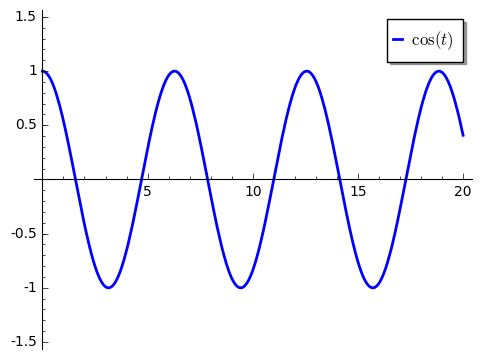

In [59]:
plt1 = plot(sol(w0=1),(t,0,20), \
            legend_label='$\,\,\cos(t)$', thickness=2);
(plt1).show(figsize=5,ymin=-1.5,ymax=1.5)

     
Όπως φαίνεται από το σχήμα, το ηλεκτρικό φορτίο στα άκρα του πυκνωτή μεταβάλλεται περιοδικά. Ουσιαστικά, καθώς το φορτίο αποκακρύνεται από τους οπλισμούς του πυκνωτή, η μεταβολή στο φορτίο αλλάζει το μαγνητικό πεδίο στο πηνίο, ή με άλλα λόγια η αποθηκευμένη ηλεκτρική ενέργεια στους οπλισμούς του πυκνωτή μετατρέπεται σε μαγνητική ενέργεια στο πηνίο. Η διαδικασία συνεχίζεται μέχρι οι οπλισμοί να φορτισθούν με αντίθετο φορτίο και μετά η διαδικασία συνεχίζεται αντίστροφα. Ο φορτισμένος πυκνωτής αποφορτίζεται και κάποια στιγμή επανέρχεται στην αρχική του κατάσταση και η όλη διαδικασία επαναλαμβάνεται από την αρχή.

**Εξαναγκασμένη ταλάντωση** 
     
Ας υποθέσουμε τώρα ότι υπάρχει εξωτερική διέγερση και είναι περιοδική, για παράδειγμα $g(t)= \cos \omega\,t$, με $\omega>0$, και ότι και πάλι δεν υπάρχει όρος απόσβεσης (δηλαδή αντίσταση στο κύκλωμα $k=0$). Τότε η ΣΔΕ παίρνει την μορφή 

$\begin{aligned} y''(t) + \omega_0^2 \, y(t) = \cos \omega \, t\,.\end{aligned}$

Η γενική λύση της ΣΔΕ είναι η

In [60]:
reset()
var('t w w0'); 
assume(w0>0); assume(w>0);
y = function('y')(t)
eq = diff(y,t,t) + w0^2*y - cos(w*t) == 0
sol = desolve(eq, y, ivar=t); sol.show()

_K2*cos(t*w0) + _K1*sin(t*w0) - cos(t*w)/(w^2 - w0^2)

     
όπου $K_1$, $K_2$ σταθερές ολοκλήρωσης που καθορίζονται από τις αρχικές συνθήκες.
Υπάρχουν δυο ενδιαφέρουσες περιπτώσεις: α) $\omega_0 \neq \omega$, αλλά $\left|\,\omega_0 - \omega\,\right|$ πολύ μικρό, και β) $\omega_0 = \omega$.

**Διαμόρφωση πλάτους** 
     
Ας υποθέσουμε ότι αρχικά $y(0)=y'(0)=0$ τότε

In [61]:
sol_lap = desolve_laplace(eq, y, ivar=t,ics=[0,0,0]); print sol_lap

-cos(t*w)/(w^2 - w0^2) + cos(t*w0)/(w^2 - w0^2)


     
που σημαίνει ότι μεταβολή του ηλεκτρικού φορτίου είναι η διαφορά δυο περιοδικών ταλαντώσεων με διαφορετικές συχνότητες $\omega_0$ και $\omega$, αλλά με ίσο πλάτος $A = \frac{1}{\omega_0^2-\omega^2}$. Χρησιμοποιώντας την τριγωνομετρική ταυτότητα

$\begin{aligned} \cos A - \cos B = 2\,\sin(\frac{A-B}{2}) \, \sin(\frac{A+B}{2}) \end{aligned}$

In [62]:
var('A B')
eq = cos(A) - cos(B) - 2*sin((B-A)/2)*sin((A+B)/2)
print eq.trig_reduce()

0


     
η λύση του ΠΑΤ γράφεται ως εξής

$\begin{aligned} y(t) = \left[ \frac{2}{\omega_0^2 - \omega^2}\,\sin \frac{(\omega_0-\omega)\,t}{2} \right] \,\sin \frac{(\omega_0+\omega)\,t}{2}  \,. \end{aligned}$

Αν ο αριθμός $\left|\,\omega_0 - \omega\,\right|$ είναι πολύ μικρός, τότε ο αριθμός $\left|\,\omega_0 + \omega\,\right|$ είναι πολύ μεγαλύτερος από τον $\left|\,\omega_0 - \omega\,\right|$. 

Συνεπώς ο όρος $\sin \frac{(\omega_0+\omega)\,t}{2}$ ταλαντώνεται πολύ γρηγορότερα από τον όρο $\sin \frac{(\omega_0-\omega)\,t}{2}\phantom{.}$, οπότε συνολικά η ταλάντωση που υπερισχύει είναι αυτή με συχνότητα $\frac{(\omega_0+\omega)}{2}\phantom{.}$, αλλά με αργή ταλάντωση (διαμόρφωση) πλάτους 

$\begin{aligned} P = \frac{2}{\omega_0^2 - \omega^2}\,\sin \frac{(\omega_0-\omega)\,t}{2} \,.\end{aligned}$

In [63]:
P = 2/(w0^2-w^2)*sin((w0-w)*t/2)

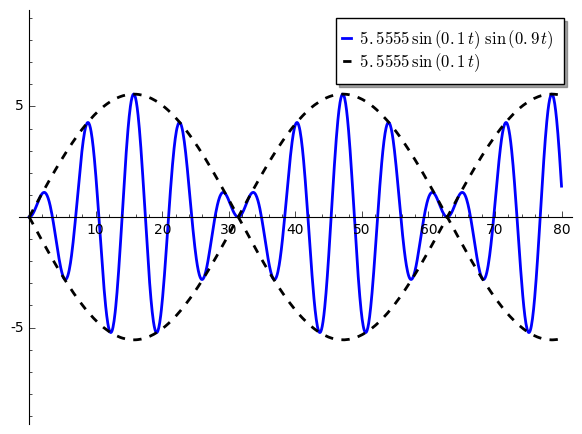

In [64]:
plt1 = plot(sol_lap(w0=0.8,w=1),(t,0,80), \
            legend_label='$\,\,5.5555 \, \sin \, (0.1\,t) \,\, \sin \, (0.9\,t)$', thickness=2);
plt2 = plot(P(w0=0.8,w=1)  , (t,0,80) , linestyle="--" ,color='black' , \
            legend_label='$\,\, 5.5555 \, \sin \, (0.1\,t)$', thickness=2);
plt3 = plot(-P(w0=0.8,w=1) , (t,0,80) , linestyle="--" ,color='black' , thickness=2);
(plt1+plt2+plt3).show(figsize=6,ymin=-9,ymax=9)

**Συντονισμός** 
     
Στην περίπτωση αυτή η συχνότητα της εξωτερικής διέγερσης είναι ίση με την ιδιοσυχνότητα του συστήματος, $\omega=\omega_0$.

In [65]:
reset()
var('t w w0');
w = w0;
assume(w0>0);
y = function('y')(t)
eq = diff(y,t,t) + w0^2*y - cos(w*t) == 0
sol = desolve(eq, y, ivar=t, ics=[0,0,0]); sol.expand().show()

1/2*t*sin(t*w0)/w0

     
Εξαιτίας της ύπαρξης του όρου $t\,\sin \omega_0\,t$ στην λύση του ΠΑΤ, το πλάτος της ταλάντωσης δεν είναι φραγμένο καθώς $t\rightarrow \infty$, και αυτό ισχύει ανεξάρτητα από τις αρχικές τιμές. Αυτό το φαινόμενο ονομάζεται συντονισμός. Ουσιαστικά, προσθέτουμε συνέχεια ενέργεια στο σύστημα στην ιδιοσυχνότητα του συστήματος και εξαναγκάζουμε το πλάτος της ταλάντωσης να μεγαλώνει μέχρι που το σύστημα καταρρέει. Βέβαια στην πραγματικότητα, αυτό είναι δύσκολο να συμβεί γιατί πάντα υπάρχουν απώλειες στο κύκλωμα και η τροφοδοτούμενη ενέργεια από την πηγή μετατρέπεται σε άλλες μορφές ενέργειας, π.χ. θερμότητα.

In [66]:
P = 1/(2*w0)*t ; print P

1/2*t/w0


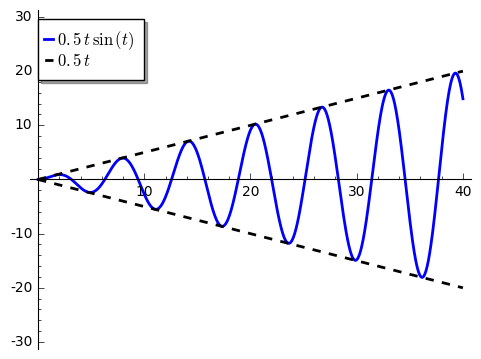

In [67]:
plt1 = plot(sol(w0=1),(t,0,40), \
            legend_label='$ 0.5 \,t\,\sin \, (t) $', thickness=2);
plt2 = plot(P(w0=1)  , (t,0,40) , linestyle="--" ,color='black' , \
            legend_label='$ 0.5\,t$', thickness=2);
plt3 = plot(-P(w0=1) , (t,0,40) , linestyle="--" ,color='black' , thickness=2);
(plt1+plt2+plt3).show(figsize=5,ymin=-30,ymax=30)

### Ηλεκτρικές ταλαντώσεις με ασυνεχείς όρους εξαναγκασμού

     
Μια από τις πιο ενδιαφέρουσες εφαρμογές του μετασχηματισμού Laplace είναι σε ΣΔΕ που διέπουν RLC κυκλώματα όπου ο όρος πηγής είναι μια ασυνεχής συνάρτηση. 
Για παράδειγμα, θεωρούμε την ΣΔΕ 

$\begin{aligned} 2\,y''+y'+2\,y = g(t) \,, \qquad 
g(t)  = \left\lbrace \begin{array}{cc} 1\,, & 5\leq t \leq 20 \,,\\
0 \,, & 0 \leq t < 5\,,\,\, t \geq 20 \,. \end{array} \right. \end{aligned}$

Από φυσική άποψη, μια ΣΔΕ αυτής της μορφής περιγράφει την μεταβολή του ηλεκτρικού φορτίου σε έναν κύκλωμα RLC  και το κύκλωμα περιλαμβάνει και μια μπαταρία ή γεννήτρια που δίνει μοναδιαίο φορτίο μόνο για $5 \leq t < 20$.  <br><br>
Αν και το Sage γνωρίζει τον μετασχηματισμό Laplace της αλματικής συνάρτησης (ή κατανομής Heaviside)

In [68]:
reset()
var('s,t')
f = unit_step(t-5);
un_lap = f.laplace(t,s) ; print un_lap

e^(-5*s)/s


     
δεν γνωρίζει τον αντίστροφο μετασχηματισμό Laplace της παραπάνω συνάρτησης

In [69]:
print inverse_laplace(un_lap,s,t)

ilt(e^(-5*s)/s, s, t)


     
Μέχρι να βελτιωθεί ο αλγόριθμος που εκτελεί τον αντίστροφο μετασχηματισμό Laplace συναρτήσεων μετατόπισης που προέρχονται από αλματικές συναρτήσεις, μπορούμε για τον σκοπό αυτό να χρησιμοποιούμε την εξής ιδιότητα του μετασχηματισμού Laplace 

$\begin{aligned} \mathcal{L} [ \, \mathbf{u}(t-c)\, f(t-c) \, ] = e^{-c\,s} \, F(s)\,,\qquad  \mbox{όπου} \qquad F(s) = \mathcal{L}[f(t)]  \,.\end{aligned}$

Οπότε, για να λύσουμε την παραπάνω ΣΔΕ με την μέθοδο του μετασχηματισμού Laplace, εργαζόμαστε ως εξής

In [70]:
reset()
var('s t'); 
y = function('y')(t)
eq = 2*diff(y,t,t) + diff(y,t) + 2*y == unit_step(t-5) - unit_step(t-20) ; 

     
Παίρνουμε τον μετ. Laplace της ΣΔΕ και έχουμε

In [71]:
eq_LT = eq.laplace(t,s); print eq_LT

2*s^2*laplace(y(t), t, s) + s*laplace(y(t), t, s) - 2*s*y(0) + 2*laplace(y(t), t, s) - y(0) - 2*D[0](y)(0) == e^(-5*s)/s - e^(-20*s)/s


     
Λύνουμε την προηγούμενη ως προς την $\mathcal{L}[y(t)]$ 

In [72]:
Y = solve(eq_LT, laplace(y(t),t,s)) ; print Y

[
laplace(y(t), t, s) == (2*s*e^(20*s)*D[0](y)(0) + (2*s^2*y(0) + s*y(0))*e^(20*s) + e^(15*s) - 1)*e^(-20*s)/(2*s^3 + s^2 + 2*s)
]


     
Όπως αναμέναμε οι αρχικές συνθήκες δεν έχουν προσδιορισθεί, οπότε ας υποθέσουμε επιπλέον ότι το αρχικό φορτίο $y(0)=Q(0)$ και η ένταση $y'(0)=I(0)=Q'(0)$, για $t=0$, είναι $y(0)=0$ και $y'(0)=0$. 

In [73]:
YY = Y[0].rhs().subs({y(0):0, diff(y,t)(0):0}).expand() ; print YY

e^(-5*s)/(2*s^3 + s^2 + 2*s) - e^(-20*s)/(2*s^3 + s^2 + 2*s)


     
Όπως παρατηρούμε ο μετασχηματισμός Laplace της άγνωστης συνάρτησης απαρτίζεται από δυο όρους 

$\begin{aligned} \mathcal{L} [ y(t) ] =  Y(s) = e^{-5\,s}\,H(s) + e^{-20\,s}\,H(s)\,,\qquad H(s)=\frac{1}{2\,s^3+s^2+2\,s}\end{aligned}$

Οπότε, σύμφωνα με την προαναφερόμενη ιδιότητα του μετασχηματισμού Laplace και του αντιστρόφου του, ο αντίστροφος μετασχηματισμός Laplace της $Y(s)$ είναι 

$\begin{aligned} y(t) = \mathcal{L}^{-1} \, [Y(s)] = \mathbf{u}(t-5)\, h(t-5) - \mathbf{u}(t-20)\, h(t-20) \end{aligned}$

όπου $h(s)$ είναι ο αντίστροφος μετασχηματισμός Laplace της $H(s)$

In [74]:
h(t) = inverse_laplace(1/(2*s^3+s^2+2*s),s,t); print h(t)

-1/30*(sqrt(15)*sin(1/4*sqrt(15)*t) + 15*cos(1/4*sqrt(15)*t))*e^(-1/4*t) + 1/2


     
Συνεπώς η λύση του προβλήματος αρχικών τιμών είναι η παρακάτω συνάρτηση

In [75]:
ysub(t) = unit_step(t-5)*h(t-5) -  unit_step(t-20)*h(t-20) ; print ysub

t |--> -1/30*((sqrt(15)*sin(1/4*sqrt(15)*(t - 5)) + 15*cos(1/4*sqrt(15)*(t - 5)))*e^(-1/4*t + 5/4) - 15)*unit_step(t - 5) + 1/30*((sqrt(15)*sin(1/4*sqrt(15)*(t - 20)) + 15*cos(1/4*sqrt(15)*(t - 20)))*e^(-1/4*t + 5) - 15)*unit_step(t - 20)


     
Η γραφική παράσταση της λύσης του ΠΑΤ δίνεται στο επόμενο σχήμα

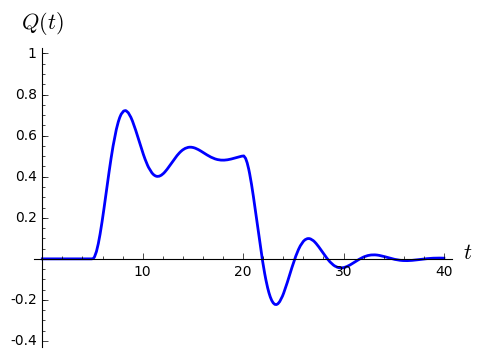

In [76]:
plt_ysub = plot(ysub(t),(t,0,40),thickness=2,ymin=-0.4,ymax=1) ; 
plt_ysub.show(figsize=5, axes_labels=['$t$','$Q(t)$'] )

    
Παρατηρούμε ότι η λύση χωρίζεται σε τρεις περιοχές:

+ $0 < t < 5$, στην οποία ισχύει η το ΠΑΤ 

$\begin{aligned} 2\,y''+y'+2\,y = 0 \,, \qquad y(0)=y'(0)=0\,.\end{aligned}$

Από το θεώρημα ύπαρξης και μοναδικότητας η λύση του ΠΑΤ στο διάστημα αυτό είναι η $y(t)=0$.

+ $5 < t < 20$, στην οποία ισχύει η το ΠΑΤ 

$\begin{aligned} 2\,y''+y'+2\,y = 1 \,, \qquad y(5)=y'(5)=0\,,\end{aligned}$

Είναι το άθροισμα μιας σταθερής (η απόκριση στην σταθερή εξωτερική τάση) και μιας φθίνουσας ταλάντωσης λόγω της ύπαρξης όρου απόσβεσης $y'$ στην αντίσταση R (η λύση της ομογενούς ΣΔΕ).

+ $t > 20$, στην οποία ισχύει το ΠΑΤ 

$\begin{aligned} 2\,y''+y'+2\,y = 0 \,, \qquad y(20)=y_1\,,\quad y'(20)=y_2\,,\end{aligned}$

που παριστάνει μια φθίνουσα ταλάντωση γύρω από την ευθεία $y=0$. Οι τιμές $y_1=y(20)$, και $y_2=y'(20)$, δηλαδή το αρχικό φορτίο και η ένταση του ρεύματος, αντίστοιχα, στο ένα άκρο του πυκνωτή, υπολογίζονται ως εξής


In [77]:
print ysub(20).n() ; 
print diff(ysub,t)(20).n()

0.501620577296880
0.0112485659727303


    
Μια εναλλακτική αντιμετώπιση του μειονεκτήματος του Sage να μην μπορεί να υπολογίζει τον αντίστροφο μετασχηματισμό Laplace συναρτήσεων μετατόπισης είναι να χρησιμοποιήσουμε το ελεύθερο ΣΣΥ `giac` , το οποίο περιλαμβάνεται στο Sage. Για παράδειγμα στο Sage εκτελούμε την εντολή

In [78]:
inv_lap = giac('invlaplace(exp(-5*s)/(2*s^3+s^2+2*s),s,t)').sage() ; inv_lap.show()

-1/30*(sqrt(15)*e^(-1/4*t + 5/4)*sin(1/4*sqrt(15)*(t - 5)) + 15*cos(1/4*sqrt(15)*(t - 5))*e^(-1/4*t + 5/4) - 15)*Heaviside(t - 5)

###  Γραμμικά συστήματα ΣΔΕ

    
Με ανάλογους αλγόριθμους όπως για ΣΔΕ πρώτης τάξης, το Sage μπορεί να επιλύσει συμβολικά και ΠΑΤ για γραμμικά συστήματα ΣΔΕ με σταθερούς συντελεστές. Για παράδειγμα, το ΠΑΤ για το σύστημα ΣΔΕ 

$\begin{aligned}
\left(\begin{array}{c} y_1'(t) \\ y_2'(t) \\y_3'(t) \end{array} \right) = 
\left( \begin{array}{rrr} 2 & -2 & 0 \\ -2 & 0 & 2 \\ 0 & 2 & 2 \end{array} \right)  \, 
\left(\begin{array}{c} y_1(t) \\ y_2(t) \\y_3(t) \end{array} \right) \,, \qquad
\left(\begin{array}{c} y_1(0) \\ y_2(0) \\y_3(0) \end{array} \right) = 
\left(\begin{array}{r} 2 \\ 1 \\ -2 \end{array} \right)
\end{aligned}$

λύνεται με την χρήση της εντολής desolve_system

In [79]:
var('t'); 
y1 = function('y1')(t); 
y2 = function('y2')(t);
y3 = function('y3')(t); 
y = vector([y1,y2,y3])
A = matrix([[2,-2,0],[-2,0,2],[0,2,2]])
system = [diff(y[i], t) - (A*y)[i] for i in range(3)]
sol = desolve_system(system, [y1,y2,y3] , ivar=t, ics=[0,2,1,-2]); print sol

[y1(t) == e^(4*t) + e^(-2*t), y2(t) == -e^(4*t) + 2*e^(-2*t), y3(t) == -e^(4*t) - e^(-2*t)]


    
όπου οι αρχικές συνθήκες δίνονται στη μορφή ics = [t0,y1(t0),y2(t0),y3(t0)]. Η λύση όπως παρατηρούμε παράγεται από εκθετικές συναρτήσεις της μορφής $e^{\lambda\,t}$, όπου $\lambda$ όπως γνωρίζουμε είναι οι ιδιοτιμές του πίνακα A.

In [80]:
print A.eigenvalues()

[4, 2, -2]


    
Στο παρακάτω σύστημα ΣΔΕ οι ιδιοτιμές του πίνακα A είναι μιγαδικές

In [81]:
reset()
var('t'); 
y1 = function('y1')(t); 
y2 = function('y2')(t);
y = vector([y1,y2])
A = matrix([[3,-4],[1,3]])
system = [diff(y[i], t) - (A * y)[i] for i in range(2)]
sol = desolve_system(system, [y1, y2], ivar=t, ics=[0,2,0]) ; print sol

[y1(t) == 2*cos(2*t)*e^(3*t), y2(t) == e^(3*t)*sin(2*t)]


In [82]:
print A.eigenvalues()

[3 - 2*I, 3 + 2*I]


**Συζευγμένοι ταλαντωτές** 
     
Ας θεωρήσουμε δυο μάζες που συνδέονται με δυο ελατήρια όπως στο παρακάτω σχήμα και ας σημειώσουμε με $x_1$, $x_2$ την απομάκρυνσή τους από την θέση ισορροπίας. 

![ ](couple300.png)

Στην μάζα $m_1$ ασκούνται δυνάμεις και από τα δυο ελατήρια. Το πρώτο ελατήριο με σταθερή απόσβεσης $k_1$ ασκεί δύναμη στην $m_1$ ίση με $-k_2\,x_1$. Το δεύτερο ελατήριο διαστέλλεται ή συστέλλεται ανάλογα με την σχετική θέση των δυο μαζών. Οπότε το δεύτερο ελατήριο ασκεί μια δύναμη στη μάζα $m_1$, ίση με $k_2\,(x_2-x_1)$. <br>
Με παρόμοιο τρόπο η μόνη δύναμη που ασκείται στην μάζα $m_2$ είναι η δύναμη επαναφοράς από το δεύτερο ελατήριο, άρα η δύναμη αυτή είναι ίση με $-k_2\,(x_2-x_1)$.            

     
Θέτοντας όλα τα παραπάνω στον δεύτερο νόμο του Newton, παίρνουμε τις εξισώσεις της κίνησης 

$\begin{eqnarray}  \begin{array}{rcl}m_1 \, x_1''(t) & = & -k_1\,x_1 + k_2\,(x_2-x_1)\,,   \\
m_2 \, x_2''(t) & = & -k_2\,(x_2-x_1)\,,    \end{array} \end{eqnarray}$

δηλαδή ένα συζευγμένο σύστημα δυο γραμμικών ΣΔΕ δεύτερης τάξης με σταθερούς συντελεστές. Το σύστημα αυτό μπορεί να γραφεί ως ένα σύστημα τεσσάρων ΣΔΕ πρώτης τάξης με την εισαγωγή των εξαρτημένων μεταβλητών (ταχυτήτων) $x_3 = x_1'$ και  $x_4 = x_2'$. Η εισαγωγή αυτή οδηγεί στο σύστημα ΣΔΕ 

$\begin{eqnarray} \left(\begin{array}{c} x_1'(t) \\ x_2'(t) \\x_3'(t) \\ x_4'(t) \end{array} \right) = 
\left( \begin{array}{cccc} 
0 & 0 & 1 & 0 \\ 
0 & 0 & 0 & 1 \\ 
-\frac{k_1+k_2}{m_1} & \frac{k_2}{m_1} &  0 & 0 \\
\frac{k_2}{m_2} & -\frac{k_2}{m_2} &  0 & 0 
\end{array} \right)  \, 
\left(\begin{array}{c} x_1(t) \\ x_2(t) \\x_3(t) \\ x_4(t) \end{array} \right) \,.
\end{eqnarray}$

     
Ας υποθέσουμε ότι οι αδιάστατες μάζες και σταθερές των ελατηρίων είναι $m_1=2$, $m_2=1$, $k_1=4$ $k_2=1$, αντίστοιχα, και οι αρχικές απομακρύνσεις και ταχύτητες των μαζών είναι 
$x_1(0)=1$, $x_2(0)=x_1'(0)=x_2'(0)=0$. Το ΠΑΤ αυτό λύνεται στο Sage όπως παρακάτω

In [83]:
var('t m1 m2 k1 k2'); 
x1 = function('x1')(t); 
x2 = function('x2')(t);
x3 = function('x3')(t); 
x4 = function('x4')(t);
x = vector([x1,x2,x3,x4])
k1=4;k2=2;m1=2;m2=1;
A = matrix([[0,0,1,0],[0,0,0,1],[-(k1+k2)/m1,k2/m1,0,0],[k2/m2,-k2/m2,0,0]])
system = [diff(x[i], t) - (A*x)[i] for i in range(4)]
sol = desolve_system(system, [x1,x2,x3,x4] , ivar=t, ics=[0,1,0,0,0])

In [84]:
print sol

[x1(t) == 2/3*cos(2*t) + 1/3*cos(t), x2(t) == -2/3*cos(2*t) + 2/3*cos(t), x3(t) == -4/3*sin(2*t) - 1/3*sin(t), x4(t) == 4/3*sin(2*t) - 2/3*sin(t)]


     
Πρόκειται για περιοδικές κινήσεις με περίοδο $2\,\pi$. 
Για να έχουμε μια γραφική εποπτεία της λύσης του προβλήματος δυο  συζευγμένων ταλαντωτών,  παρακάτω προβάλλουμε την λύση στο χώρο των φάσεων $(x_1,x_1')$, και τις απομακρύνσεις $x_1(t)$, $x_2(t)$ ως συναρτήσεις του χρόνου $t$ στο ίδιο γράφημα.

In [85]:
ph1 = parametric_plot( [ sol[0].rhs(), sol[2].rhs() ] , (t,0,2*pi),xmin=-1,xmax=1, ymin=-2,ymax=2, \
        fontsize=12,color='blue',thickness=2,aspect_ratio=1,figsize=5 , \
                      axes_labels=['$x_1$','$x^\prime_1 $'] )
ph2 = parametric_plot( [ sol[1].rhs(), sol[3].rhs() ] , (t,0,2*pi),xmin=-1,xmax=1, ymin=-2,ymax=2, \
        fontsize=12, color='red', thickness=2, aspect_ratio=1.2,figsize=5 ,\
                      axes_labels=['$x_2$','$x^\prime_2 $'])

In [86]:
ga = graphics_array([ph1, ph2])

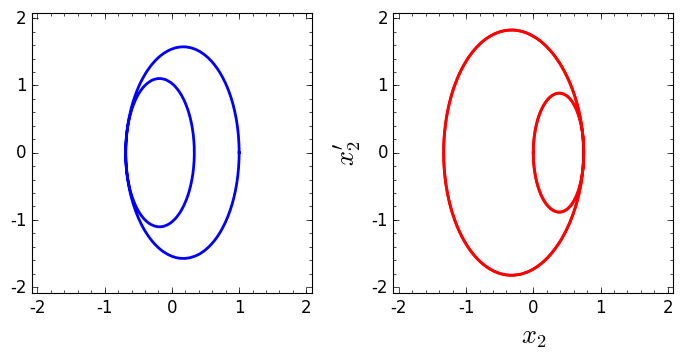

In [87]:
ga.show(frame=True, axes=False, figsize=[7,4],aspect_ratio=1, xmin=-2,xmax=2, ymin=-2,ymax=2,)

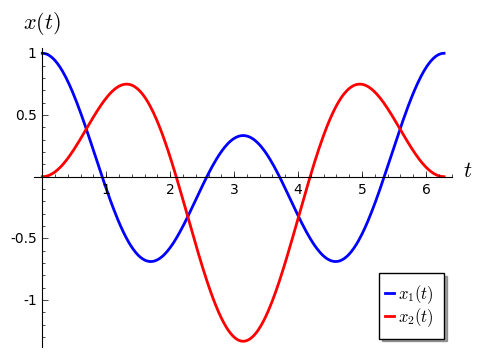

In [88]:
pos1 = plot( sol[0].rhs(),(t,0,2*pi),color='blue',legend_label='$ x_1(t) $',thickness=2);
pos2 = plot( sol[1].rhs(),(t,0,2*pi),color='red' ,legend_label='$ x_2(t) $',thickness=2);
(pos1+pos2).show(figsize=5,axes_labels=['$t$','$x(t)$'] , legend_loc='lower right' )

##  Αριθμητική ολοκλήρωση ΣΔΕ 

    
Όπως έχει γίνει ήδη φανερό από τα θέματα που έχουμε διαπραγματευτεί μέχρι εδώ, το Sage είναι ένα σύνολο από αλγεβρικούς και αριθμητικούς αλγόριθμους που επιλύουν πολλά μαθηματικά προβλήματα και ταυτόχρονα μας παρέχει την δυνατότητα να έχουμε την γραφική αναπαράσταση της λύσης τους. Ειδικότερα στη μελέτη των διαφορικών εξισώσεων ο συνδυασμός αυτός είναι ένα από τα μεγαλύτερα πλεονεκτήματα του Sage. Για πολλά και πολύ ενδιαφέροντα προβλήματα που μοντελοποιούνται από ένα σύστημα μη-γραμμικών ΣΔΕ δεν είναι δυνατόν να βρούμε την λύση του συστήματος ΣΔΕ σε κλειστή μορφή, και συνεπώς δεν υπάρχει συμβολική επίλυση στο Sage. Για αυτά τα προβλήματα το Sage μας παρέχει ένα πλήθος από αριθμητικούς αλγόριθμους για να επιλύσουμε το πρόβλημα αρχικών-συνοριακών τιμών αριθμητικά.

Ο λόγος που έχουμε στην διάθεσή μας ένα μεγάλο πλήθος από τέτοιου είδους αριθμητικούς αλγόριθμους είναι επειδή ένας αλγόριθμος μπορεί να είναι καλά προσαρμοσμένος για ΣΔΕ ενός τύπου, ενώ σε προβλήματα διαφορετικού τύπου (π.χ. προβλήματα με περιοδικές ή σχεδόν περιοδικές τροχιές, χαοτικά κτλ.) να είναι καλύτερα προσαρμοσμένος ένας διαφορετικός αλγόριθμος. 

Επιπλέον, το Sage μας επιτρέπει να έχουμε πρόσβαση στην βιβλιοθήκη GSL (GNU Scientific
Library) η οποία μας δίνει την δυνατότητα να χρησιμοποιήσουμε ακόμα περισσότερους αριθμητικούς αλγόριθμους. Γενικά το ζήτημα της αριθμητικής ολοκλήρωσης ενός συστήματος μη-γραμμικών ΣΔΕ είναι αρκετά ευρύ και για να μην χαθούμε θα παρουσιάσουμε στο παρόν εδάφιο τα βασικά αριθμητικά εργαλεία - εντολές που μας παρέχει το Sage.

+ `desolve_odeint`  
Ο αριθμητικός αλγόριθμος για επίλυση ΣΔΕ με την εντολή `odeint` του συστήματος `scipy`, το οποίο με την σειρά του χρησιμοποιεί το πρόγραμμα `lsoda` από το πακέτο `odepack` της Fortran.

+ `desolve_rk4`  
Ο κλασικός αλγόριθμος Runge-Kutta 4ης τάξης από το Maxima για βαθμωτές ΣΔΕ 

+ `desolve_system_rk4`  
Ο αλγόριθμος Runge-Kutta 4ης τάξης από το Maxima για συστήματα ΣΔΕ.

+ `desolve_mintides, desolve_tides_mpfr`
Το πακέτο `tides` http://gme.unizar.es/software/tides. Πρόκειται για αλγόριθμο που ολοκληρώνει αριθμητικά το σύστημα ΣΔΕ με την μέθοδο σειρών Taylor. Το κύριο χαρακτηριστικό του πακέτου είναι ότι εκτελεί ολοκλήρωση του συστήματος ΣΔΕ με όση ακρίβεια δεκαδικών ψηφίων θέλουμε! Για να το χρησιμοποιήσουμε χρειάζεται να το εγκαταστήσουμε με την εντολή: `sage -i tides` αν έχουμε εγκαταστήσει το Sage ως root σε όλο το λειτουργικό σύστημα, ή `./sage -i tides` στο directory του Sage στον λογαριασμό που έχουμε εγκαταστήσει το Sage τοπικά ως user.

    
Ας δούμε πως μπορούμε να χρησιμοποιήσουμε τα εργαλεία αυτά στην επίλυση απλών και πιο σύνθετων δυναμικών συστημάτων.

###  Πληθυσμιακό μοντέλο θηρευτή - θηράματος 

    
Ας υποθέσουμε ότι σε ένα περιβάλλον όπου οι διατροφικοί πόροι είναι πεπερασμένοι υπάρχουν δυο βιολογικά είδη από τα οποία το ένα είναι ο θηρευτής και το άλλο το θήραμα. Για παράδειγμα, οι πληθυσμοί φώκιες και πιγκουίνοι, καρχαρίες και ψάρια, πασχαλίτσες και μελίγκρες, αλεπούδες και λαγοί είναι κάποιοι πληθυσμοί της κατηγορίας θηρευτής-θήραμα. 

Το πιο απλό μοντέλο ΣΔΕ που περιγράφει τον πληθυσμό του θηράματος $x(t)$, και του θηρευτή $y(t)$ δίνεται από το σύστημα μη-γραμμικών ΣΔΕ

    
$\begin{aligned} \frac{d \,x}{d\,t} = a\,x\, - b\,x\,y\,, \qquad \frac{d \,y}{d\,t} = -c\,y\, + d\,b\,x\,y\,, \end{aligned}$

όπου $a,b,c,d$ θετικές αταθερές και ο χρόνος $t$  μετριέται σε χρόνια, και αναφέρεται ώς μοντέλο Lotka-Volterra.

+ Ο όρος $a\,x$ παριστάνει την αύξηση του πληθυσμού του θηράματος όταν δεν υπάρχουν θηρευτές.

+ Οι όροι $-b\,x\,y$ και $d\,b\,x\,y$ παριστάνουν την αλληλεπίδραση των δυο ειδών. Ο πληθυσμός του θηράματος υποφέρει και ο πληθυσμός του θηρευτή αυξάνεται από την αλληλεπίδραση των ειδών.

+ Ο όρος $-c\,y$ παριστάνει την μείωση του πληθυσμού του θηρευτή όταν δεν υπάρχουν  θηράματα.

    
Αν και το σύστημα ΣΔΕ μπορεί να ολοκληρωθεί (η ΣΔΕ που προκύπτει διαιρώντας το παραπάνω σύστημα είναι χωριζομένων μεταβλητών) θα το λύσουμε αριθμητικά. Ο λόγος είναι ότι το ολοκλήρωμα που προκύπτει είναι δύσκολο να το χρησιμοποιήσουμε για να περιγράψουμε τους πληθυσμούς παραμετρικά από τον χρόνο $t$. Όμως η αριθμητική επίλυση μας δίνει τόσο την λύση παραμετρικά ως προς $t$, όσο και ως προς τις μεταβλητές $x,y$.

Πρώτα απ' όλα ορίζουμε τις μεταβλητές και θέτουμε συγκεκριμένες τιμές στις σταθερές $a,b,c,d$. Μετά ορίζουμε την ΣΔΕ σε διανυσματική μορφή και θεωρούμε μια αρχική τιμή, πχ $x(0)=10$, $y(0)=5$, δηλαδή αρχικά υπάρχουν 10 λαγοί και 5 αλεπούδες. Μετά θεωρούμε το διάστημα διάστημα που θα λύσουμε την ΣΔΕ καθώς και το βήμα ολοκλήρωσης. Με αυτές τις πληροφορίες είμαστε έτοιμοι να εκτελέσουμε την εντολή που ολοκληρώνει αριθμητικά το σύστημα ΣΔΕ. Αυτά που πειγράψαμε με λόγια υλοποιούνται στα παρακάτω.

In [89]:
reset()
var('t x y')
(a, b, c, d) = (1., 0.1, 1.5, 0.75)
f=[ a*x - b*x*y , -c*y + d*b*x*y ]
x0y0 = [10 , 5]
ts = 0.01;
tt=srange(0., 15.,ts);
sol = desolve_odeint(f, x0y0 , tt , [x , y] , ivar=t)
l1 , l2 = sol.T

In [90]:
print type(l1)

<type 'numpy.ndarray'>


    
H λύση είναι στην μορφή ενός πίκανα που οι γραμμές αποτελούνται από τα ζευγάρια αριθμών που αντιστοιχούν οι πληθυσμοί $(x(t_i), y(t_i))$, στους χρόνους $t_i$, στους οποίους έχουμε ζητήσει να υπολογισθεί η λύση. Στο συγκεκριμένο παράδειγμα τα $t_i$ διατρέχουν το διάστημα $[0,15]$ με
βήμα $h=0.01$. Παίρνοντας το ανάστροφο του πίνακα μπορούμε να αποσυμπλέξουμε τους πληθυσμούς και να τους θέσουμε στα ξεχωριστά διανύσματα l1 και l2, αντίστοιχα. 

    
Με τις παρακάτω εντολές δίνουμε μια γραφική παράσταση των πληθυσμών $x(t_i)$ και $y(t_i)$ στους αντίστοιχους χρόνους $t_i$, στο ίδιο γραφικό 

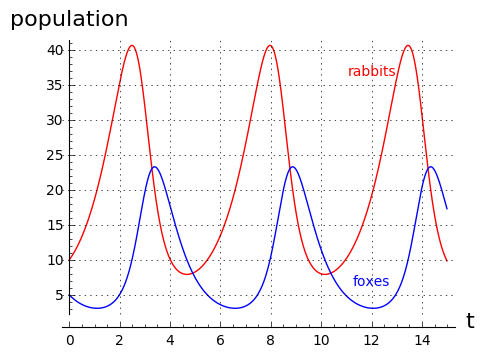

In [91]:
p1 = line(zip(tt, l1), color='red')
p1 += text("rabbits" ,(12,37), fontsize=10, color='red')
p2 = line(zip(tt, l2), color='blue')
p2 += text("foxes" ,(12,7), fontsize=10, color='blue')
(p1+p2).show(figsize=5,axes_labels=["t","population"],ticks=2, gridlines=true)

    
Για να έχουμε γενικότερη εποπτεία των λύσεών μας στα παρακάτω σχεδιάζουμε το πεδίο διευθύνσεων και λύνουμε αριθμητικά το σύστημα ΣΔΕ για διάφορες αρχικές τιμές των πληθυσμών, και τέλος απεικονίζουμε όλα μαζί τα γραφικά στο xy επίπεδο.

In [92]:
def g(x,y):
    v = vector(f) 
    return v/v.norm()

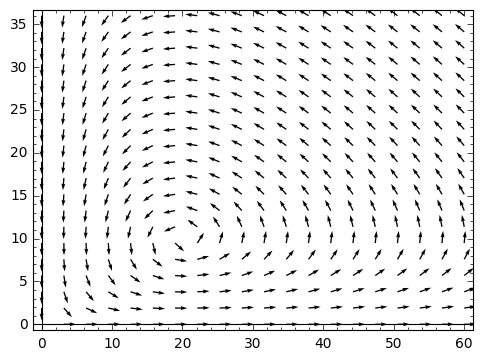

In [93]:
q = plot_vector_field(g(x, y), (x, 0, 60), (y, 0, 36)); q.show(figsize=5)

In [94]:
n = 11; L = srange(6, 18, 12 / n); R = srange(3, 9, 6 / n)
CI = zip(L, R)
for j in range(n):
    X = desolve_odeint(f, CI[j] , tt, [x , y] , ivar=t) 
    q += line(X, color=hue(.8-float(j)/(1.8*n)))

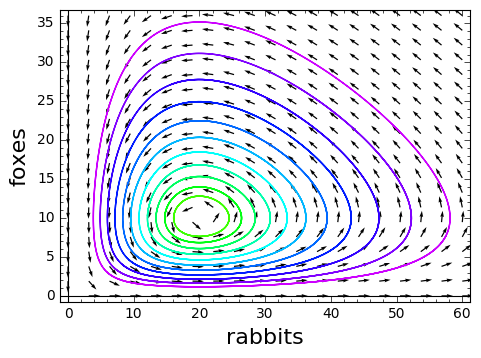

In [95]:
q.show(figsize=5,axes_labels=["rabbits","foxes"])

    
Για τις τιμές των σταθερών $a,b,c,d$ που δώσαμε, παρατηρούμε ότι οι δυο πληθυσμοί συνυπάρχουν αρμονικά στο περιβάλλον. Στα δυναμικά συστήματα θα μάθετε πως να βρίσκετε και να χαρακτηρίζετε ποιοτικά τα δυο σημεία ισορροπίας του παραπάνω συστήματος ΣΔΕ $(x,y)=(0,0$ και $(x,y)=(\frac{c}{b\,d},\frac{a}{b})$ και ότι υπάρχουν τιμές των παραμέτρων που ένα από τα δυο είδη μπορεί να εξαφανισθεί.

### Οριακοί κύκλοι - Ο ταλαντωτής Van der Pol 

    
Ένας οριακός κύκλος είναι μια απομονωμένη περιοδική τροχιά ενός δυναμικού συστήματος. Οριακοί κύκλοι εμφανίζονται σε δυναμικά συστήματα στο επίπεδο τα οποία μοντελοποιούν τεχνολογικά και φυσικά φαινόμενα. Για παράδειγμα, το παρακάτω  ηλεκτρικό κύκλωμα αποτελείται από μια τρίοδο, ένα κύκλωμα RLC, του οποίου το πηνίο είναι σε αμοιβαία επαγωγή με ένα άλλο πηνίο M. 

![ ](triode250.png)

    
Η μη-γραμμική ΣΔΕ που περιγράφει την μεταβολή του φορτίου στο ένα άκρο του πυκνωτή 

$\begin{eqnarray} \frac{d^2\,x}{d\,t^2} + \varepsilon\,(x^2-1)\,\frac{d\,x}{d\,t} + x =0\,, \end{eqnarray}$

και διατυπώθηκε το 1926 από τον  Balthasar Van der Pol. Eισαγάγοντας την μεταβλητή $y=x'(t)$, η παραπάνω ΣΔΕ μπορεί να γραφεί ισοδύναμα ως το ακόλουθο σύστημα 

$\begin{eqnarray} \frac{d\,x}{d\,t} = y \, , \qquad \frac{d\,y}{d\,t} = -x - \varepsilon\,(x^2-1)\,y \,. \end{eqnarray}$

Θα λύσουμε αριθμητικά το παραπάνω μη-γραμμικό σύστημα ΣΔΕ για την τιμή της παραμέτρου $\varepsilon=10$ και με αρχικές τιμές $x(0)=1$, $y(0)=0$.

In [96]:
reset()
var('t x y')
epsilon = 10.
f = [ y , -x -epsilon*(x^2-1)*y ]

In [97]:
var('t x y')
P=desolve_system_rk4( f , [x,y] , ics=[0,1,0], ivar=t, end_points=100, step=0.05)
Q=[ [i,j] for i,j,k in P]
xy = [ [j,k] for i,j,k in P]
LP=line(Q)

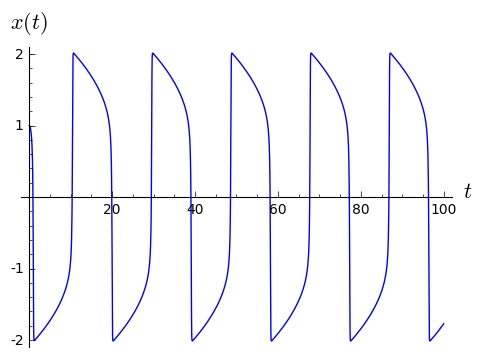

In [98]:
LP.show(figsize=5,axes_labels=["$t$","$x(t)$"])

    
Για μικρό χρόνο μετά από $t=0$, στο σύστημα εκτελεί περιοδική ταλάντωση με σταθερό πλάτος. Ο οριακός κύκλος φαίνεται στο χώρο των φάσεων $xy$. Πιο συγκεκριμένα, στο παρακάτω γραφικό απεικονίζουμε το πεδίο διευθύνσεων που ορίζει το σύστημα  ΣΔΕ, μαζί με την λύση που βρήκαμε αριθμητικά στο επίπεδο των φάσεων $x-y$.

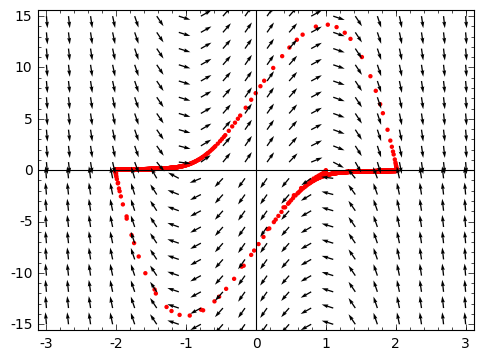

In [99]:
def g(x,y):
    v = vector(f) 
    return v/v.norm()
van_vf = plot_vector_field(g(x, y), (x, -3, 3), (y, -15, 15)); 
xy_plot = list_plot(xy, color='red' , size=10);
(van_vf+xy_plot).show(figsize=5)

### Μη γραμμικές διαταραγμένες ταλαντώσεις

    
Όπως θα δείτε στα δυναμικά συστήματα, οι τροχιές ενός αυτόνομου δυναμικού συστήματος δεν μπορούν να τέμνονται, και συνεπώς το θεώρημα Poincare-Bendixson συνεπάγεται ότι δεν μπορεί να υπάρχει χάος σε δυο διαστάσεις. Ωστόσο, χάος μπορεί να εμφανισθεί σε αυτόνομα τρισδιάστατα συστήματα και σε δισδιάστατα μη-αυτόνομα (ή διαταραγμένα) συστήματα της μορφής

$\begin{eqnarray} x''(t) = f(x(t),x'(t),t)\,, \end{eqnarray}$

όπου η συνάρτηση $f$ εξαρτάται με ρητό τρόπο από τον χρόνο $t$. Για τέτοια συστήματα οι τροχιές επιτρέπεται να τέμνονται στο επίπεδο. Οι λεγόμενες τομές Poincaré μας επιτρέπουν να μελετήσουμε τις περίπλοκες τροχιές που ακολουθεί το μη-αυτόνομο δυναμικό σύστημα. 

Για παράδειγμα, θεωρούμε την εξίσωση Duffing η οποία είναι η μη-γραμμική μη-αυτόνομη ΣΔΕ δεύτερης τάξης  

$\begin{eqnarray} \frac{d^2\,x}{d\,t^2} + k\,\frac{d\,x}{d\,t}+ ( x^3-x ) = \Gamma \, \cos \omega\,t \,.\end{eqnarray}$

![ ](duff200.png)

Η ΣΔΕ αυτή μοντελοποιεί ένα περιοδικά διαταραγμένο ταλαντωτή του οποίου η δύναμη επαναφοράς είναι κυβική, το $x(t)$ παριστάνει την απομάκρυνση της μάζας $m$ από την θέση ισορροπίας, το $k$ είναι μια σταθερή απόσβεσης, $Γ$ και $\omega$ είναι το πλάτος, και η συχνότητα της δύναμης της διαταραχής, αντίστοιχα.

    
Οι τροχιές του παραπάνω διαταραγμένου μη-αυτόνομου δυναμικού συστήματος, μπορούν αντιστοιχιστούν στις τροχιές ενός αυτόνομου συστήματος σε έναν τόρο. Η αντιστοιχία αυτή είναι δυνατή, εισαγάγοντας μια τρίτη μεταβλητή $\theta = \omega\,t$. Οπότε η ΣΔΕ του Duffing μετατρέπεται στο παρακάτω αυτόνομο σύστημα ΣΔΕ 

$\begin{aligned} \frac{d\,x}{d\,t} = y\,, \, \qquad  \frac{d\,y}{d\,t} = x - k\,y - x^3 + \Gamma \, \cos \theta \,, \qquad \frac{d\,\theta}{d\,t} = \omega\,.\end{aligned}$

![ ](tor250.png)

Μια τροχιά του δυναμικού συστήματος Duffing αντιστοιχεί σε με μια τροχιά γύρω από έναν τόρο με περίοδο $\frac{2\,\pi}{\omega}$. Η αντιστοιχία αυτή μας οδηγεί με φυσικό τρόπο στην λεγόμενη απεικόνιση Poincaré ενός επιπέδου με $\theta=\theta_0$ στον εαυτό του. Στο διπλανό σχήμα απεικονίζεται η πρώτη βόλτα της τροχιάς με αρχικό σημείο $P_0$, η οποία τέμνει το επίπεδο $\theta=\theta_0$ στο σημείο $P_1$. Η συγκεκριμένη τροχιά καθώς και όλες οι άλλες με διαφορετικά αρχικά σημεία ξεδιπλώνονται στο εσωτερικό του τόρου στον τρισδιάστατο χώρο. 

Θα λύσουμε το παραπάνω σύστημα για συγκεκριμένες τιμές των παραμέτρων $k=0.3$ και $\omega=1.25$, και για διάφορες τιμές του πλάτους της διαταραχής $Γ$, με την odeint του scipy.

In [100]:
reset()

In [101]:
var('t x y')
Gamma=0.5;omega=1.25;k=0.3;
f=[ y , x - k*y - x^3 + Gamma*cos(omega*t) ]
ci=[0.4,0.]
ts = n(2.*pi/omega/100.);
tt=srange(0.,900.,ts);
sol=desolve_odeint(f,ci,tt,[x,y],ivar=t)

In [102]:
X, Y = sol.T
pe=line(zip(X[0:len(X)],Y[0:len(Y)]),thickness=1,xmin=-1.5,xmax=1.5,ymin=-1.5,ymax=1.5)

In [103]:
poi= [ [ sol[i,0] , sol[i,1]] for i in range(0,len(tt),100)];
pmape = points(poi[10:len(poi)],size=2, color='black',xmin=-1.5,xmax=1.5,ymin=-1.5,ymax=1.5)

In [104]:
gb = graphics_array([pe, pmape]); 

![ ](pmap_abc450.png)

Μια έκθεση πορτρέτων φάσης (αριστερά) και η αντίστοιχη τομή Poincaré στο επίπεδο $\theta=0$ (δεξιά), του δυναμικού συστήματος Duffing, με τιμές των παραμέτρων $k = 0.3$ και $ω = 1.25$:**(α)**Г = 0.2 διαταραγμένη τροχιά με περίοδο ένα,**(β)**Γ = 0.3 μια υποαρμονική τροχιά περιόδου δύο, και**(γ)**Г =0.31 μια μόλις εμφανιζόμενη υποαρμονική τροχιά περιόδου 4.

![ ](pmap_def450.png)

Μια έκθεση πορτρέτων φάσης (αριστερά) και η αντίστοιχη τομή Poincaré στο επίπεδο $\theta=0$ (δεξιά), του δυναμικού συστήματος Duffing, με τιμές των παραμέτρων $k = 0.3$ και $ω = 1.25$:**(δ)**Г = 0.37 Διαταραγμένη  υποαρμονική τροχιά περιόδου πέντε,**(ε)**Γ = 0.5 (χάος) Στην τομή Poincaré, κάθε "γλώσσα" κάτω από αλλαγή κλίμακας δημιουργείται από διαφορετικές νέες γλώσσες, και**(στ)**Г =0.8 Διαταραγμένη τροχιά περιόδου ένα.

### Ο παράξενος ελκυστής του Lorenz 

    
Το 1963 o μετεωρολόγος Edward Lorenz κατασκεύσασε ένα μαθηματικό μοντέλο μεταφοράς αερίων μαζών. Πρόκειται για ένα αρκετά απλό σύστημα μη-γραμμικών ΣΔΕ, που όμως οι τροχιές του δυναμικού αυτού συστήματος παρουσιάζουν χαοτική συμπεριφορά. Το σύστημα του Lorenz δίνεται από τις εξισώσεις. 

$\begin{aligned} \frac{d\, x}{d\,t} =& \sigma\,(y-x)\,, \phantom{y}  \\
   \frac{d\, y}{d\,t} =& x\,(\rho-z)-y \,, \\ 
   \frac{d\, z}{d\,t} =& x\,y-\beta\,z\,, \qquad\phantom{y}
\end{aligned}$
 
όπου το $x$ μετρά την ταχύτητα του αέρα, το $y$ μετρά την αλλαγή της θερμοκρασίας στην οριζόντια διεύθυνση, ενώ το $z$ την κάθετη, $\sigma$ είναι ο αριθμός Prandtl, $\rho$ ο αριθμός Rayleigh, και $\beta$ ένας παράγοντας αλλαγής κλίμακας.
Για τις τιμές των παραμέτρων $\sigma=10$, $\beta=\frac{8}{3}$, και $\rho=28$, ο Lorenz ανακάλυψε την ύπαρξη ενός παράξενου ελκυστή. Με την βοήθεια το Sage και του πακέτου tides θα λύσουμε το παραπάνω σύστημα ΣΔΕ, αριθμητικά, για να εντοπίσουμε τον παράξενο ελκυστή του Lorenz.

    
Για την επίλυση του συστήματος ΣΔΕ μπορείτε να χρησιμοποιήσετε την εντολή desolve_odeint(), όπως παραπάνω ή την Runge-Kutta 4ης τάξης του Maxima. Για τους εκπαιδευτικούς σκοπούς του μαθήματος αρκούν οι αλγόριθμοι αυτοί. 

Όμως το Sage μας παρέχει την δυνατότητα να χρησιμοποιήσουμε τον αλγόριθμο tides. Πρόκειται για έναν αλγόριθμο αριθμητικής ολοκλήρωσης συστημάτων ΣΔΕ που βασίζεται στην μέθοδο σειρών Taylor. Το κύριο του χαρακτηριστικό του πακέτου είναι η εκτέλεση αριθμητικής ολοκλήρωσης με όση υπολογιστική ακρίβεια θέλουμε, μέσω της χρήσης της βιβλιοθήκης `MPFR`. Το πακέτο `tides` έχει ενσωματωθεί στο `Sage` μέσω της εντολής `desolve_tides_mpfr()`, και μέχρι την ώρα που γράφονται οι σημειώσεις αυτές είναι ο μαναδικός συνδυασμός ΣΣΥ που μας επιτρέπει να χρησιμοποιήσουμε το tides με μια μόνο εντολή!

    
Με τις παρακάτω εντολές ολοκληρώνουμε το σύστημα του Lorenz για $t\in[0,T]$ κατά μήκος μιας τροχιάς περιόδου 10 με ακρίβεια 100 δεκαδικών ψηφίων.

In [105]:
reset()

In [106]:
var('t x y')
s = 10; r = 28; b = 8/3;
f(t,x,y,z)= [s*(y-x),x*(r-z)-y,x*y-b*z]
x0 = -13.7636106821342005250144010543616538641008648540923684535378642921202827747268115852940239346395038284
y0 = -19.5787519424517955388380414460095588661142400534276438649791334295426354746147526415973165506704676171
z0 = 27
T = 15.586522107161747275678702092126960705284805489972439358895215783190198756258880854355851082660142374

In [107]:
sol = desolve_tides_mpfr(f, [x0, y0, z0], 0, T, T, 1e-100, 1e-100, 100)

In [108]:
print sol

[[0.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000, -13.7636106821342005250144010543616538641008648540923684535378642921202827747268115852940239346395038, -19.5787519424517955388380414460095588661142400534276438649791334295426354746147526415973165506704676, 27.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000], [15.5865221071617472756787020921269607052848054899724393588952157831901987562588808543558510826601424, -13.7636106821342005250144010543616538641008648540923684535378642921202827747268115852940239346470530, -19.5787519424517955388380414460095588661142400534276438649791334295426354746147526415973165506634524, 27.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000345574]]


    
Αλλάζοντας τις αρχικές συνθήκες σε $(x_0,y_0,z_0) = (-1,-1,2)$, και για χρόνο $Τ=50$ με βήμα $0.01$, και με την προεπιλεγμένη ακρίβεια του MPFR (16 δεκαδικών ψηφίων) μπορούμε να ολοκληρώσουμε το σύστημα του Lorenz ως εξής:

In [109]:
x0 = -1
y0 = -1
z0 =  2

In [110]:
sol1 = desolve_tides_mpfr(f, [x0, y0, z0], 0 , 50, 0.01)

In [111]:
print sol1[0]; print type(sol1); print len(sol1)

[0.0000000000000000000000000000000000000000000000000, -1.000000000000000000000000000000000000000000000000, -1.000000000000000000000000000000000000000000000000, 2.000000000000000000000000000000000000000000000000]
<type 'list'>
5001


    
Το πακέτο μας επιστρέφει μια λίστα αριθμών στην οποία η πρώτη στήλη (0) είναι οι τιμές του χρόνου t, και στις στήλες 1,2,3 οι τιμές των μεταβλητών $x,y,z$, αντίστοιχα, υπολογισμένες στα χρονικά βήματα που εκτελείται η αριθμητική ολοκλήρωση. Το αποτέλεσμα μπορούμε να το απεικονίσουμε σε ένα τρισδιάστατο γραφικό κατά τα γνωστά. Όμως υπάρχει στην διάθεσή μας και η πανίσχυρη βιβλιοθήκη γραφικών matplotlib για ένα αρκετά ευπαρουσίαστο γραφικό.
Μπορούμε να μεταφέρουμε τα αριθμητικά αποτελέσματα που πήραμε από το Sage στην matplotlib και να τα σχεδιάσουμε με την την matplotlib ως εξής:

In [112]:
# Φορτώνουμε το numpy, την matplotlib κι ένα εργαλείο της για τρισδιάστατους άξονες.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [113]:
# Δημιουργούμε 3 np.array με τις τιμές των x, y, z
xs = np.empty((len(sol1)))
ys = np.empty((len(sol1)))
zs = np.empty((len(sol1)))

In [114]:
# Μεταφέρουμε τα δεδομένα μας στα αντίστοιχα np.array
for i in range(len(sol1)):
    xs[i] = sol1[i][1]
    ys[i] = sol1[i][2] 
    zs[i] = sol1[i][3]

In [115]:
# Δημιουργούμε το γραφικό με την matplotlib
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(xs, ys, zs, lw=0.001,color='blue',linewidth=1.5)
# Εδώ μπορείτε να προσθέσετε άλλο ένα γραφικό πχ μια τροχιά περιόδου ένα 
# ax.plot(xs1, ys1, zs1, lw=0.001,color='red',linewidth=1.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")

In [116]:
# Σώζουμε το γραφικό για μελλοντική χρήση
fig.savefig('lorenz.png')

    
Η γραφική αναπαράσταση της αριθμητικής λύσης του συστήματος ΣΔΕ φαίνεται στα ακόλουθα σχήματα.

![ ](lor500.png)

α) **Γραφικό από την matplotlib**. Ο παράξενος ελκυστής του Lorenz για τις τιμές των παραμέτρων $\sigma = 10$, $\rho = 28$, και $\beta = 8/3$ (μπλέ χρώμα), και μια περιοδική τροχιά που περικλείει τα δυο ασταθή σημεία ισορροπίας (εκτός της αρχής (0,0,0) )  ακριβώς μια φορά (κόκκινο χρώμα). 
β) **Γραφικό από το πακέτο mayavi**. Ο παράξενος ελκυστής του Lorenz, από τα ίδια αριθμητικά αποτελέσματα, διαμορφωμένος όμως με το εξειδικευμένο πακέτο τρισδιάστατων γραφικών **mayavi**, σε αλληλεπίδραση με την matplotlib (interactive mode).

![ ](maya600.png)

**Γραφικά από το πακέτο mayavi**. Προβολές του παράξενου ελκυστής του Lorenz α) στο $xy$ επίπεδο β) στο $xz$ επίπεδο και γ) στο $yz$ επίπεδο, για τις τιμές των παραμέτρων $\sigma = 10$, $\rho = 28$, και $\beta = 8/3$. Για μια διαδραστική τρισδιάστατη γραφική απεικόνιση δες: http://www.math.upatras.gr/~tasos/lorenz.html


 
Την αλλαγή χρωματισμού της τροχιάς όταν αυτή γυροφέρνει τα ασταθή σημεία ισορροπίας την επιτύγχαμε ως εξής. Πρώτα απ' όλα βρίσκουμε στο Sage τα σημεία ισορροπίας (σημεία στα οποία μηδενίζονται οι παράγωγοι, $x'(t)=y'(t)=z'(t)=0$) για τις δοσμένες τιμές των παραμέτρων.

In [117]:
print solve([ f[0](t,x,y,z)==0,f[1](t,x,y,z)==0,f[2](t,x,y,z)==0],x,y,z )

[
[x == 6*sqrt(2), y == 6*sqrt(2), z == 27],
[x == -6*sqrt(2), y == -6*sqrt(2), z == 27],
[x == 0, y == 0, z == 0]
]


 
και στην συνέχεια για συνάρτηση χρωματισμού στο πακέτο mayavi θεωρούμε την εξής:

    orbit_col = (np.array(x)+8.5)*np.sign(np.array(x)+8.5)/17.0 - (np.array(x)-8.5)*np.sign(np.array(x)-8.5)/17.0

 
Ουσιαστικά χρωματίζουμε την τροχιά με την συνάρτηση 

$\begin{aligned} \frac{(x+6\,\sqrt{2})}{{12\,\sqrt{2}}} \, {\rm sign} \left(\,x+6\,\sqrt{2}\,\right) - 
\frac{(x-6\,\sqrt{2})}{{12\,\sqrt{2}}} \, {\rm sign} \left(\,x-6\,\sqrt{2}\,\right)\,, \end{aligned}$

 
η οποία έχει πεδίο τιμών το $[-1,1]$, όπου ${\rm sign}$ η συνάρτηση προσήμου. Με αυτόν τον τρόπο όταν η τροχιά βρίσκεται κοντά στο ένα ασταθές σημείο γίνεται κόκκινη, ενώ κοντά στο άλλο παίρνει ιώδες χρώμα και χρωματίζεται με τα ενδιάμεσα χρώματα του ουράνιου τόξου όταν περνάει κοντά από το τρίτο  ασταθές σημείο, δηλαδή την αρχή των αξόνων $(0,0,0)$. 